# Projet Machine Learning 4A - Notebook Python

## Importation des librairies

In [210]:
#pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import lightgbm as lgb
%matplotlib inline

In [21]:
#Model
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Importation du jeu de données

In [22]:
data= pd.read_csv("global-data-on-sustainable-energy (1).csv")
data.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

En affichant que les 5 premières lignes de notre data frame, on remarque déjà qu'il y a des données manquantes.

# Partie 1 : Analyse exploratoire du jeu de données

### Question 1

In [23]:
data.shape

(3649, 21)

Nous remarquons qu'il se trouve alors 21 variables dans notre jeu de données on ne sait pas encore si elles sont qualitatives ou quantitatives. Nous pouvons supposer que la variable 'Entity' est qualitative, car  elle détient 3649 observations qui sont les noms des pays du monde.

In [24]:
data.describe().T

count          mean  \
Year                                                3649.0  2.010038e+03   
Access to electricity (% of population)             3639.0  7.893370e+01   
Access to clean fuels for cooking                   3480.0  6.325529e+01   
Renewable-electricity-generating-capacity-per-c...  2718.0  1.131375e+02   
Financial flows to developing countries (US $)      1560.0  9.422400e+07   
Renewable energy share in the total final energ...  3455.0  3.263816e+01   
Electricity from fossil fuels (TWh)                 3628.0  7.036500e+01   
Electricity from nuclear (TWh)                      3523.0  1.345019e+01   
Electricity from renewables (TWh)                   3628.0  2.396801e+01   
Low-carbon electricity (% electricity)              3607.0  3.680118e+01   
Primary energy consumption per capita (kWh/person)  3649.0  2.574398e+04   
Energy intensity level of primary energy (MJ/$2...  3442.0  5.307345e+00   
Value_co2_emissions_kt_by_country                   3221.0  1.598665e+05   
Renewables (% equivalent primary energy)            1512.0  1.198671e+01   
gdp_growth                                          3332.0  3.441610e+00   
gdp_per_capita                                      3367.0  1.328377e+04   
Land Area(Km2)                                      3648.0  6.332135e+05   
Latitude                                            3648.0  1.824639e+01   
Longitude                                           3648.0  1.482269e+01   

                                                             std          min  \
Year                                                6.054228e+00  2000.000000   
Access to electricity (% of population)             3.027554e+01     1.252269   
Access to clean fuels for cooking                   3.904366e+01     0.000000   
Renewable-electricity-generating-capacity-per-c...  2.441673e+02     0.000000   
Financial flows to developing countries (US $)      2.981544e+08     0.000000   
Renewable energy share in the total final energ...  2.989490e+01     0.000000   
Electricity from fossil fuels (TWh)                 3.480519e+02     0.000000   
Electricity from nuclear (TWh)                      7.300662e+01     0.000000   
Electricity from renewables (TWh)                   1.044311e+02     0.000000   
Low-carbon electricity (% electricity)              3.431488e+01     0.000000   
Primary energy consumption per capita (kWh/person)  3.477322e+04     0.000000   
Energy intensity level of primary energy (MJ/$2...  3.532020e+00     0.110000   
Value_co2_emissions_kt_by_country                   7.736611e+05    10.000000   
Renewables (% equivalent primary energy)            1.499464e+01     0.000000   
gdp_growth                                          5.686720e+00   -62.075920   
gdp_per_capita                                      1.970987e+04   111.927225   
Land Area(Km2)                                      1.585519e+06    21.000000   
Latitude                                            2.415923e+01   -40.900557   
Longitude                                           6.634815e+01  -175.198242   

                                                              25%  \
Year                                                  2005.000000   
Access to electricity (% of population)                 59.800890   
Access to clean fuels for cooking                       23.175000   
Renewable-electricity-generating-capacity-per-c...       3.540000   
Financial flows to developing countries (US $)      260000.000000   
Renewable energy share in the total final energ...       6.515000   
Electricity from fossil fuels (TWh)                      0.290000   
Electricity from nuclear (TWh)                           0.000000   
Electricity from renewables (TWh)                        0.040000   
Low-carbon electricity (% electricity)                   2.877847   
Primary energy consumption per capita (kWh/person)    3116.737300   
Energy intensity level of primary energy (MJ/$2...       3.170000   
Value_co2_emis

Nous remarquons d'après la variable count de notre describe (similaire au summary sur R), que les variables ne possèdent pas le même nombre d'observations. Nous pourrons l'observer plus précisément plus tard. De plus, cette analyse est faite sur les variables quantitatives de notre jeu de données, et nous pouvons observer la présence de la variable 'Year', qui devrait être quantitative, ainsi que l'abscence de la variable 'Density', qui elle devrait être quantitative. Des transformations du type des variables s'imposent !

In [25]:
data.describe(include = 'object').T

count unique          top freq
Entity            3649    176  Afghanistan   21
Density\n(P/Km2)  3648    124           25  147

Nous affichons les caractéristiques des variables quantitatives avant la transformation du type et nous remarquons la présence de la variable 'Density'. 

On se demande aussi combien de variables uniques possèdent chaque variable.

In [26]:
unique_values =  data.nunique()
unique_values

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [28]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [29]:
data.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
data['Density'] = pd.to_numeric(data['Density'].str.replace(',', ''), errors='coerce').astype('Int64')

In [30]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

On bien changé la variable 'Density' en numérique (qualitative).

In [31]:
data['Year']=data['Year'].astype('object')

In [32]:
data.dtypes

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [33]:
data.rename(columns={"Value_co2_emissions_kt_by_country":"CO2" , 'Land Area(Km2)':'Land'} , inplace=True)

### Question 2

## Valeurs manquantes

<BarContainer object of 21 artists>

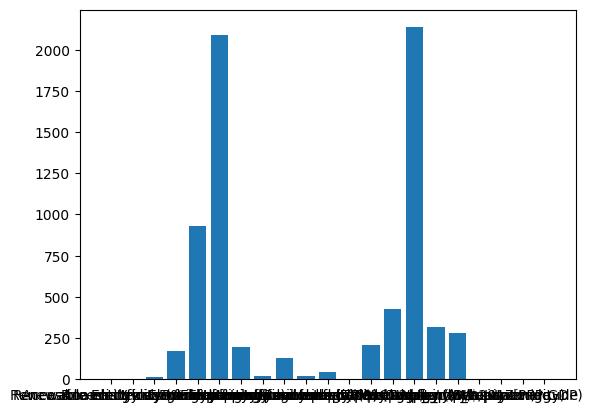

In [34]:
données_manquantes = data.isna().sum()
plt.bar(données_manquantes.index, données_manquantes.values)

In [35]:
fig = px.bar(x=données_manquantes.index, y=données_manquantes.values, labels={'x': 'Colonnes (Variables)', 'y': 'Nombre de Valeurs Manquantes'},
             title='Nombre de Valeurs Manquantes dans chaque Colonne')
fig.show()

In [36]:
data.drop(columns=['Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [37]:
data.shape

(3649, 18)

### Question 3


On créé un nouveau jeu de données comportant seulement les individus sans valeurs manquantes


In [38]:
data2 = data.dropna()

In [39]:
data2.shape

(2868, 18)

# Analyse descriptive unidimensionnelle

### Question 4

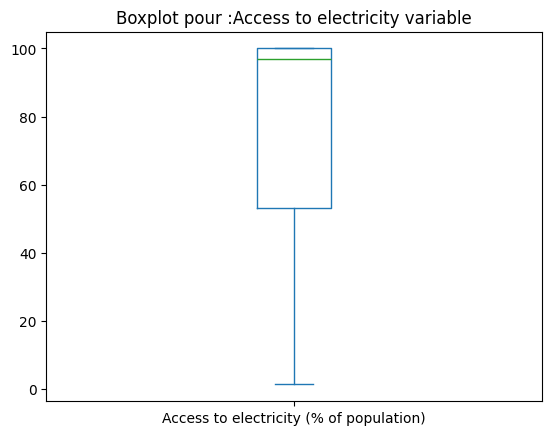

In [40]:
data2['Access to electricity (% of population)'].plot(kind='box')
plt.title("Boxplot pour :Access to electricity variable")
plt.show()

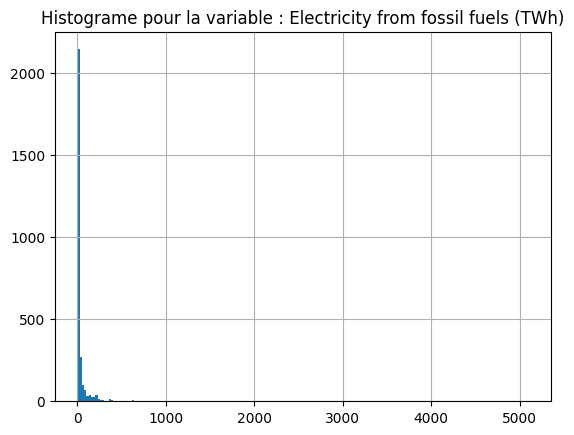

In [208]:
data2['Electricity from fossil fuels (TWh)'].hist(bins=200)
plt.title("Histograme pour la variable : Electricity from fossil fuels (TWh)")
plt.show()

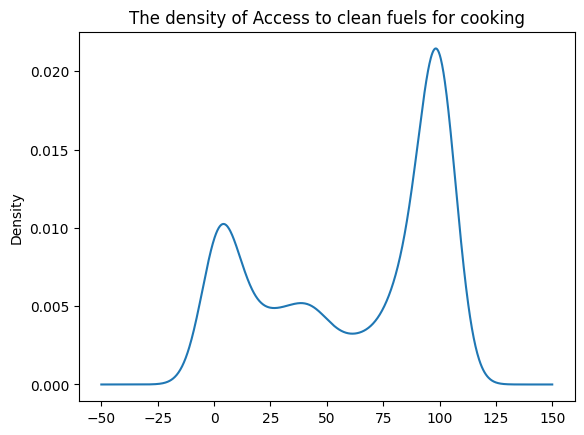

In [42]:
data2["Access to clean fuels for cooking"].plot(kind="density")
plt.title("The density of Access to clean fuels for cooking")
plt.show()

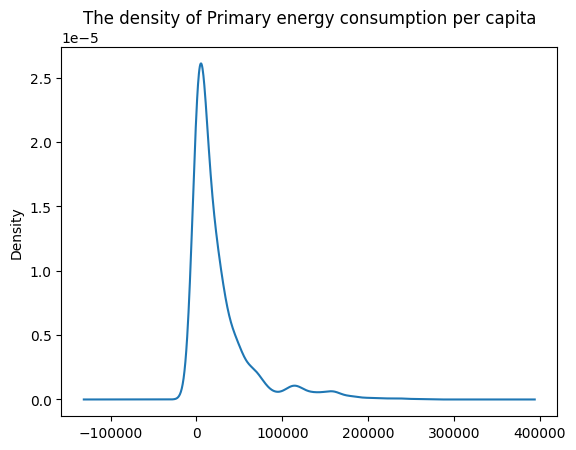

In [43]:
data2["Primary energy consumption per capita (kWh/person)"].plot(kind="density")
plt.title("The density of Primary energy consumption per capita")
plt.show()

In [44]:
from math import sqrt, log
data2["Primary energy consumption per capita new"]=data2["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(x))
del data2["Primary energy consumption per capita (kWh/person)"]

C:\Users\romai\AppData\Local\Temp/ipykernel_80132/2701592788.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



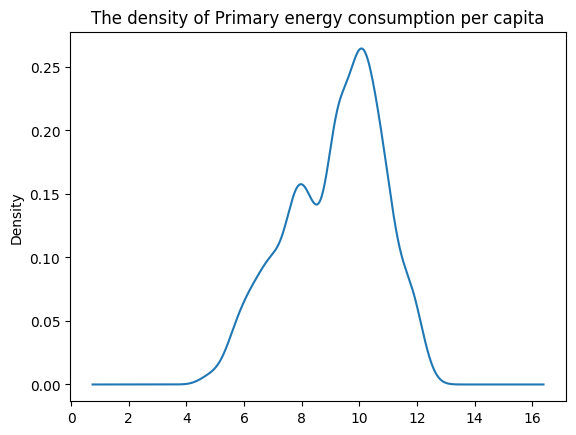

In [45]:
data2["Primary energy consumption per capita new"].plot(kind="density")
plt.title("The density of Primary energy consumption per capita")
plt.show()

### Question 5

In [211]:
import plotly.express as px
CO2_max = data2.groupby('Entity')['CO2'].max().reset_index()
CO2_max = CO2_max.sort_values(by='CO2', ascending=False)

In [214]:
fig = px.bar(
    CO2_max,  
    x='Entity',  
    y='CO2',  
    color='CO2',  
    title='Maximum d\'émissions de CO2 par pays',  
    labels={'Country': 'Pays', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

In [215]:
CO2_max5=CO2_max.head(5)

fig = px.bar(
    CO2_max5,  
    x='Entity',  
    y='CO2',  
    color='CO2',  
    title='Top 5 des pays ayant le plus emis de CO2',  
    labels={'Country': 'Pays', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

# Analyse descriptive multidimensionnelle

### Question 6

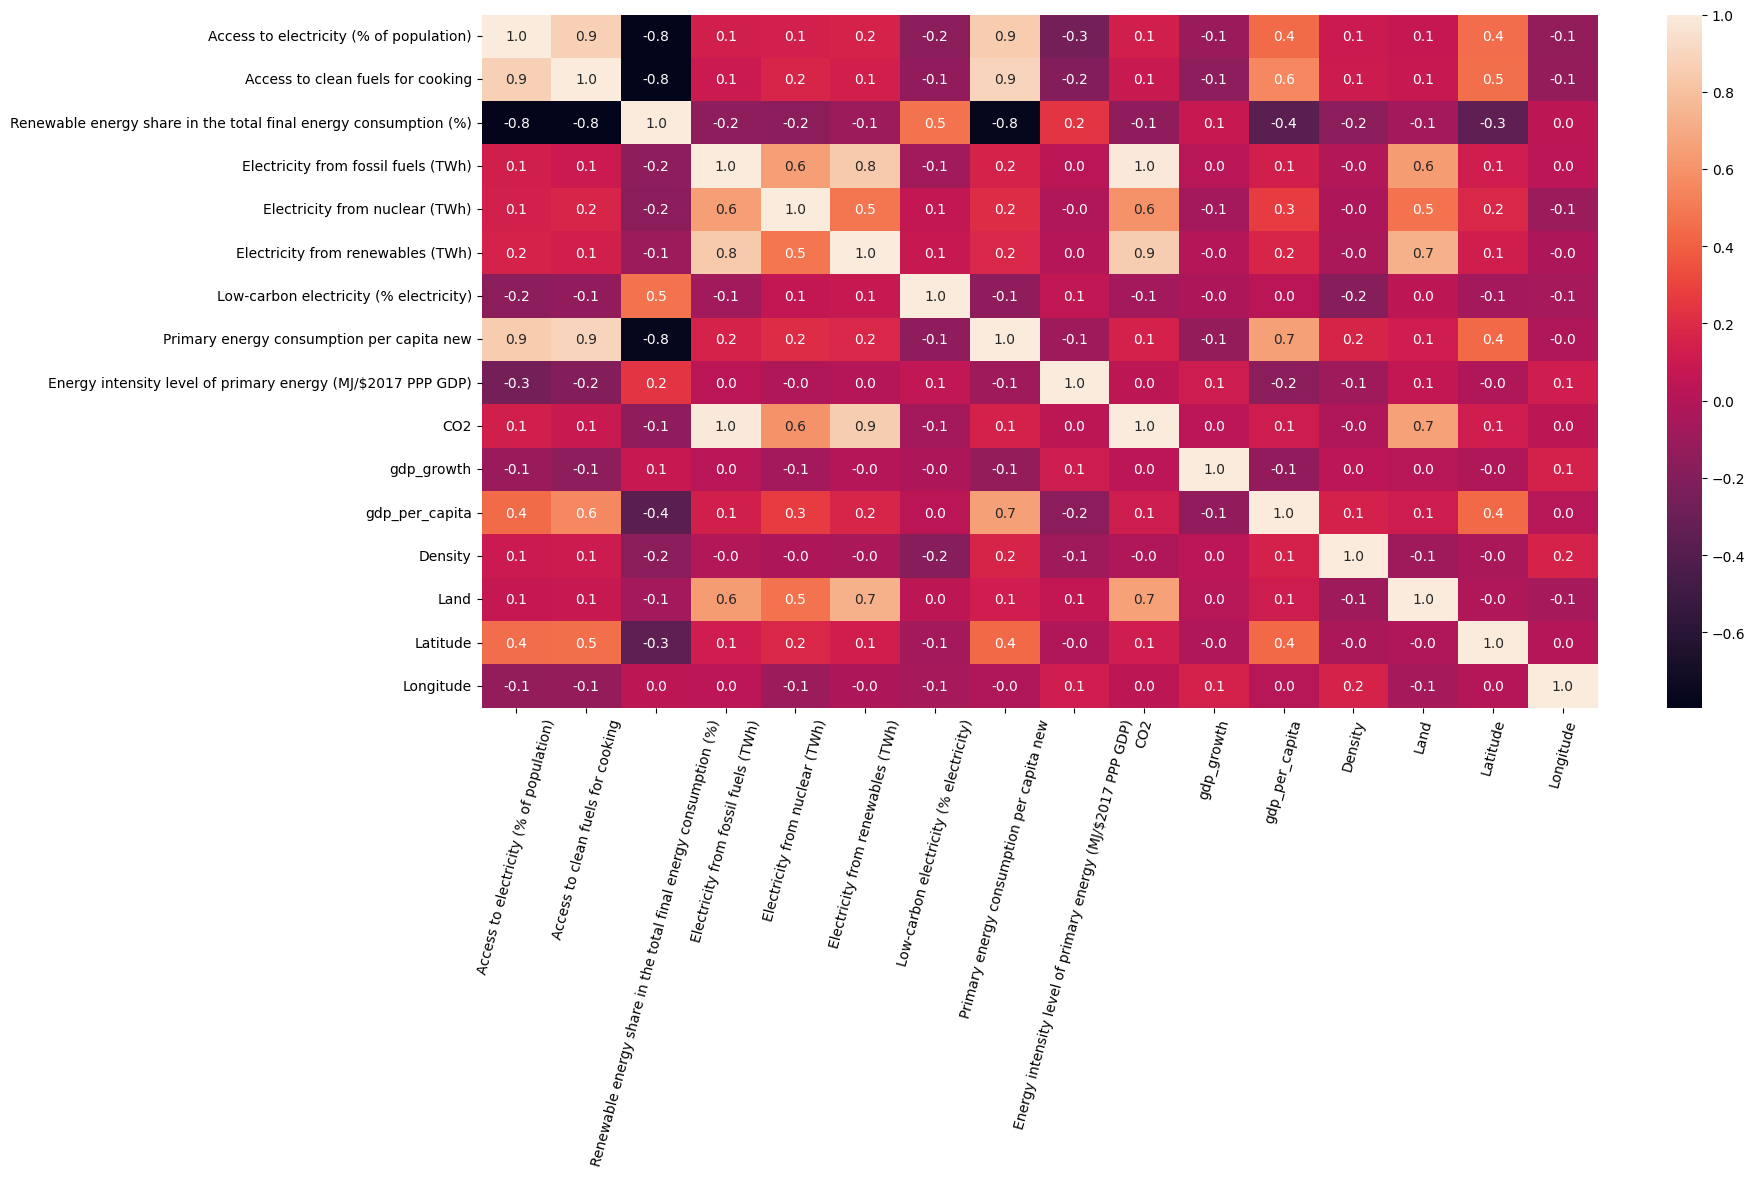

In [219]:
plt.figure(figsize=(18,9))

cols=[ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']

# correlation entre les colonnes
sns.heatmap(data2[cols].corr(), annot=True, fmt='.1f')
plt.xticks(rotation=75)

plt.show()

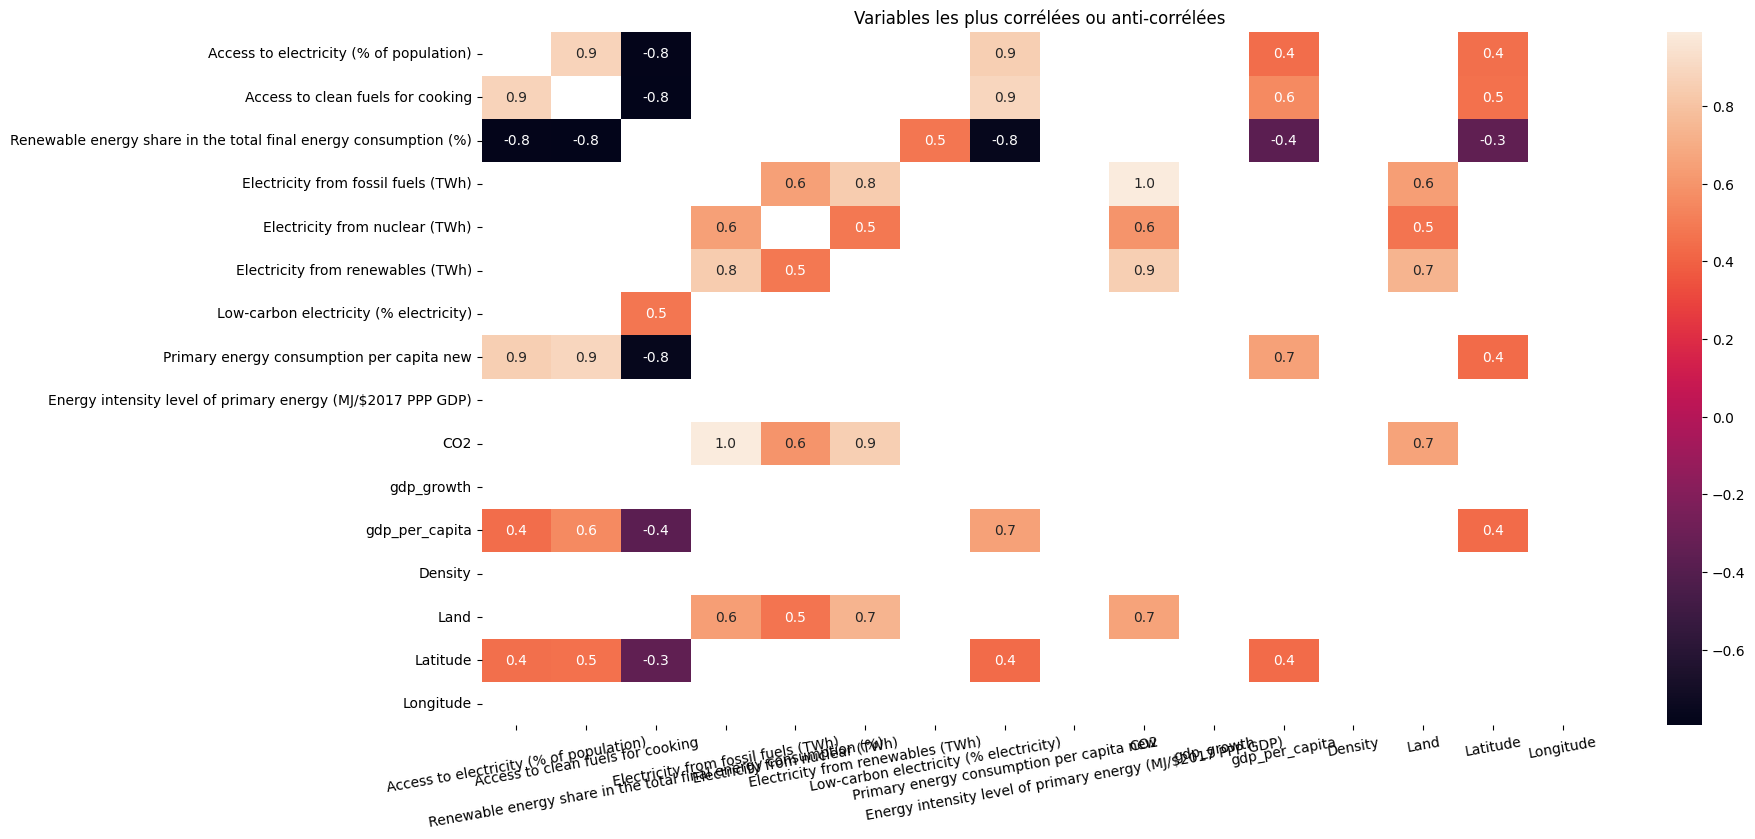

In [230]:
plt.figure(figsize=(18,9))

# plus forte corrélation entre les colonnes
corr = data2[cols].corr()
kot = corr[(corr !=1.000) & ((corr >0.4) | (corr<=-0.3))]
sns.heatmap(kot, annot=True, fmt='.1f')
plt.xticks(rotation=10)
plt.title("Variables les plus corrélées ou anti-corrélées")

plt.show()

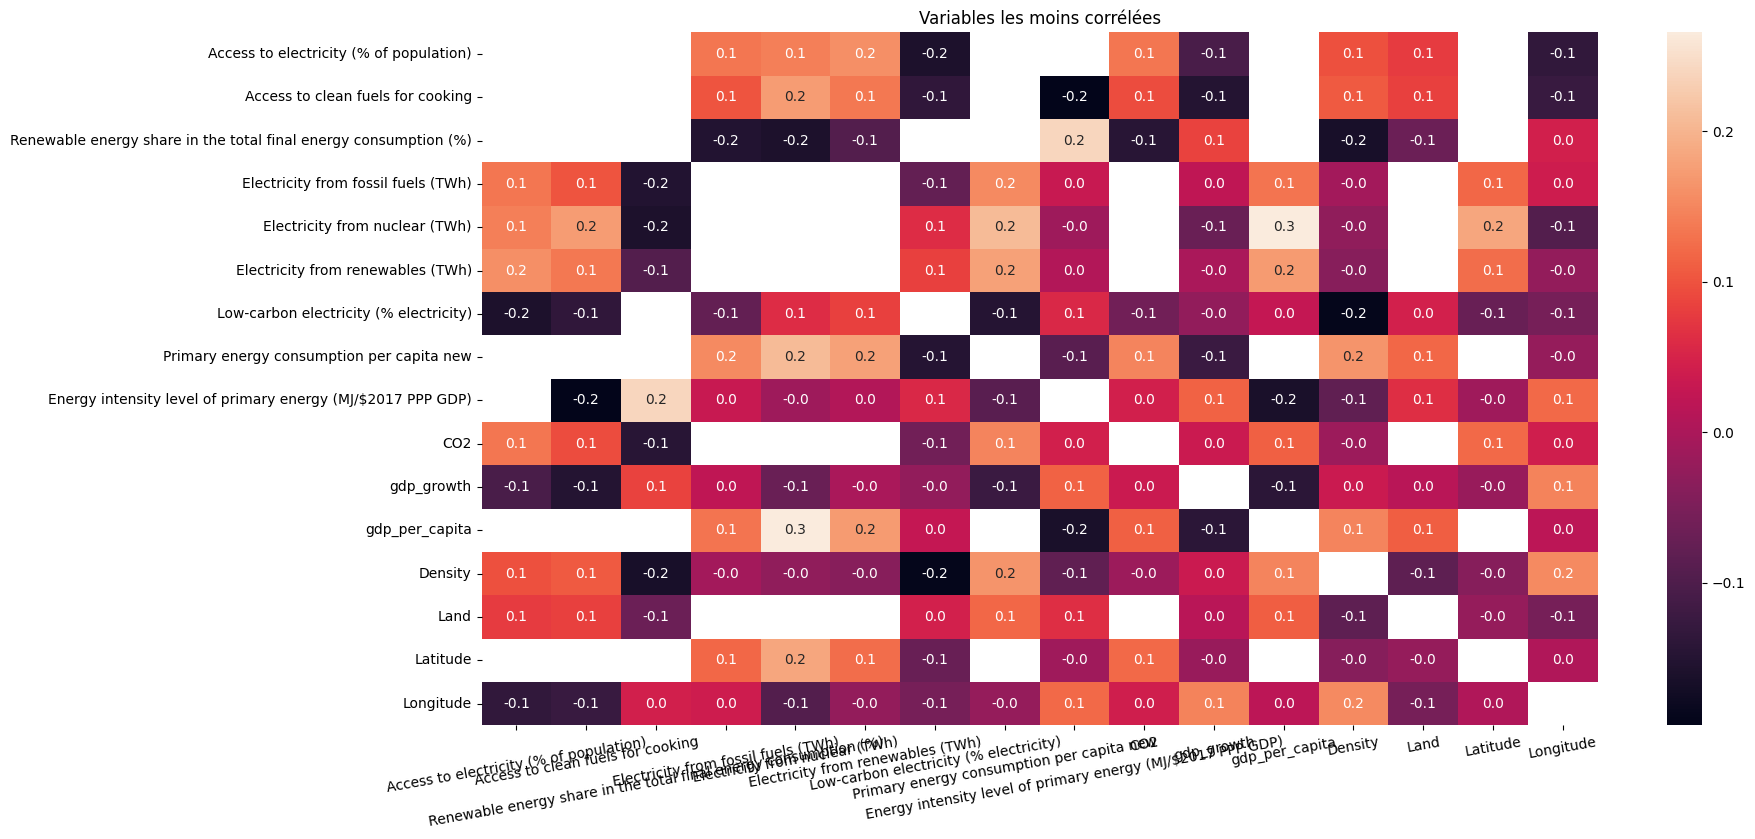

In [231]:
plt.figure(figsize=(18,9))

# plus faible corrélation entre les colonnes
corr = data2[cols].corr()
kot = corr[(corr !=1.000) & ((corr < 0.4) & (corr>-0.2))]
sns.heatmap(kot, annot=True, fmt='.1f')
plt.xticks(rotation=10)
plt.title("Variables les moins corrélées")

plt.show()

In [48]:
data2.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude', 'Primary energy consumption per capita new'],
      dtype='object')

In [49]:
plt.figure(figsize=(18,9))

cols2=[ 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)']

fig = px.scatter(data2[cols2])
fig.show()

<Figure size 1800x900 with 0 Axes>

On remarque une grande dépendance entre les variables 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)' et 'Electricity from renewables (TWh)', comme vu sur le graphe de corrélations. Mais pas trop avec'Low-carbon electricity (% electricity)'.

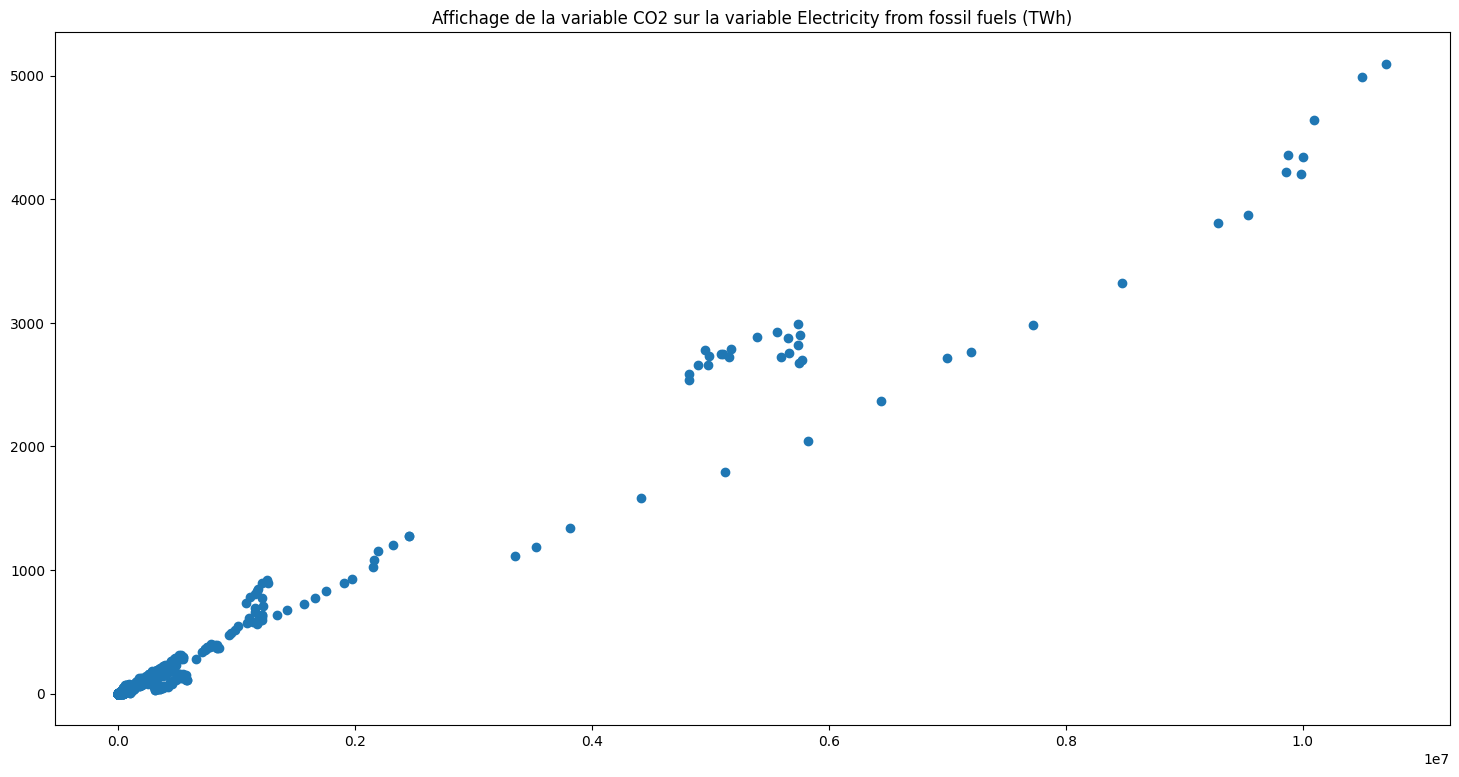

In [233]:
plt.figure(figsize=(18,9))

cols3=['CO2','Electricity from fossil fuels (TWh)' ]

fig = plt.scatter(data2['CO2'], data2['Electricity from fossil fuels (TWh)'])
plt.title("Affichage de la variable CO2 sur la variable Electricity from fossil fuels (TWh)")
plt.show()

On plot la variable la plus corrélée avec la variable à prédire qui est CO2. Nous remarquons une distribution linéraire entre les variables. 

### Question 7

## PCA

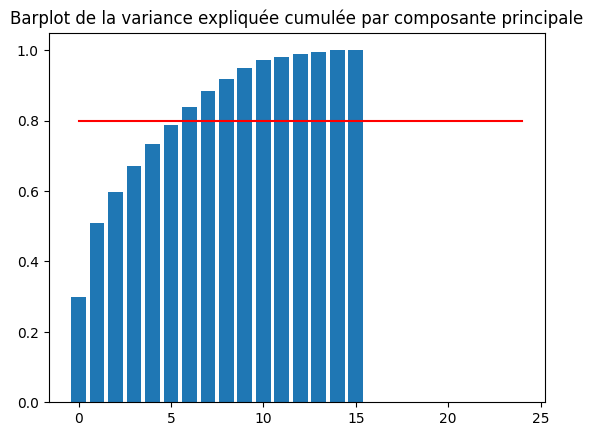

In [51]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale


pca = PCA()

cols_quanti= [ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']

data2_quanti= data2[cols_quanti]

#On estime nos composantes principales
pcaR = pd.DataFrame(scale(data2_quanti), columns = data2_quanti.columns)
C = pca.fit(pcaR).transform(pcaR)

plt.bar(np.arange(len(pca.explained_variance_ratio_))[0:24],height=np.cumsum(pca.explained_variance_ratio_[0:24]))
plt.plot(range(0,25), np.ones(25)*0.8, c='r')
plt.title("Barplot de la variance expliquée cumulée par composante principale")
plt.show()

Pour expliquer 80% de la variance, il faut prendre les 7 premières composantes principales. 

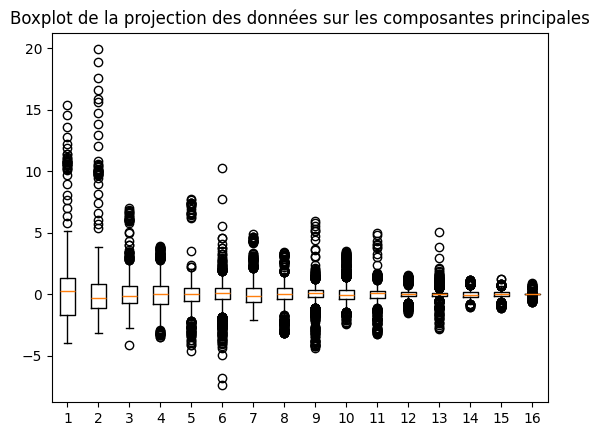

In [52]:
plt.boxplot(C[:,0:20])
plt.title("Boxplot de la projection des données sur les composantes principales")
plt.show()

## Projection des variables sur le plan d'ACP

Projection sur la première et deuxième dimension d'ACP :

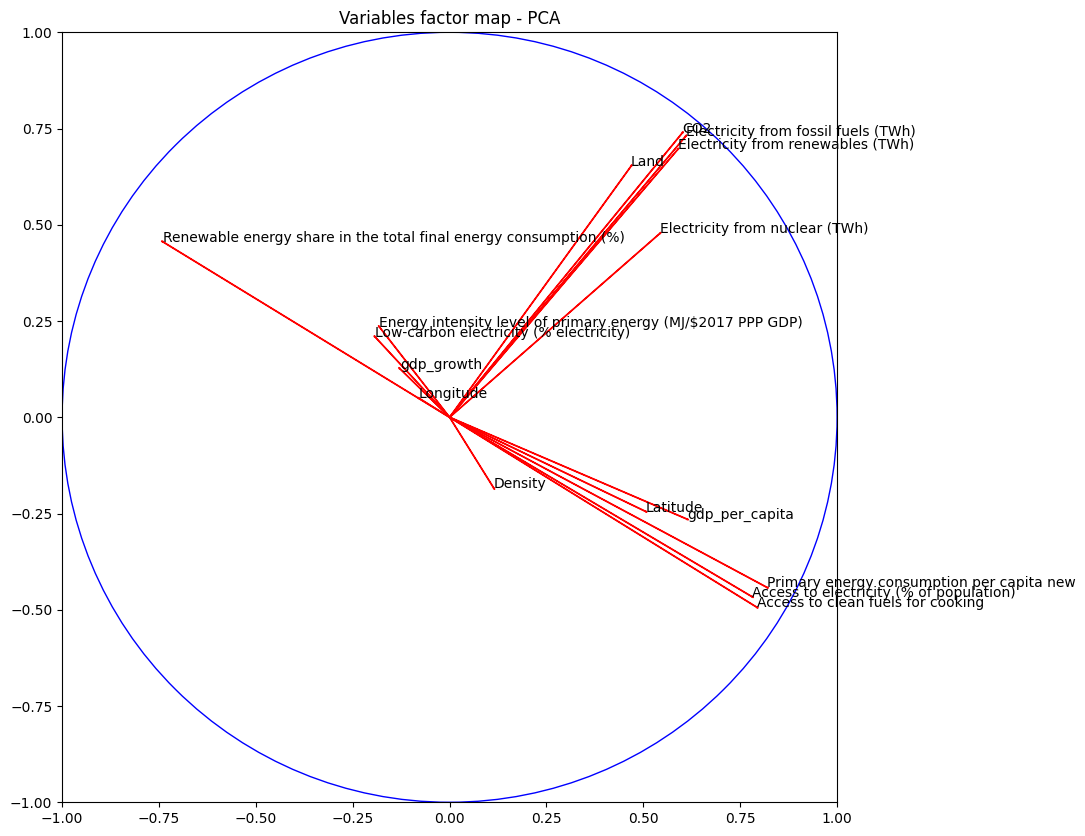

In [53]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data2_quanti.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()

Projection sur la première et troisième dimension d'ACP :

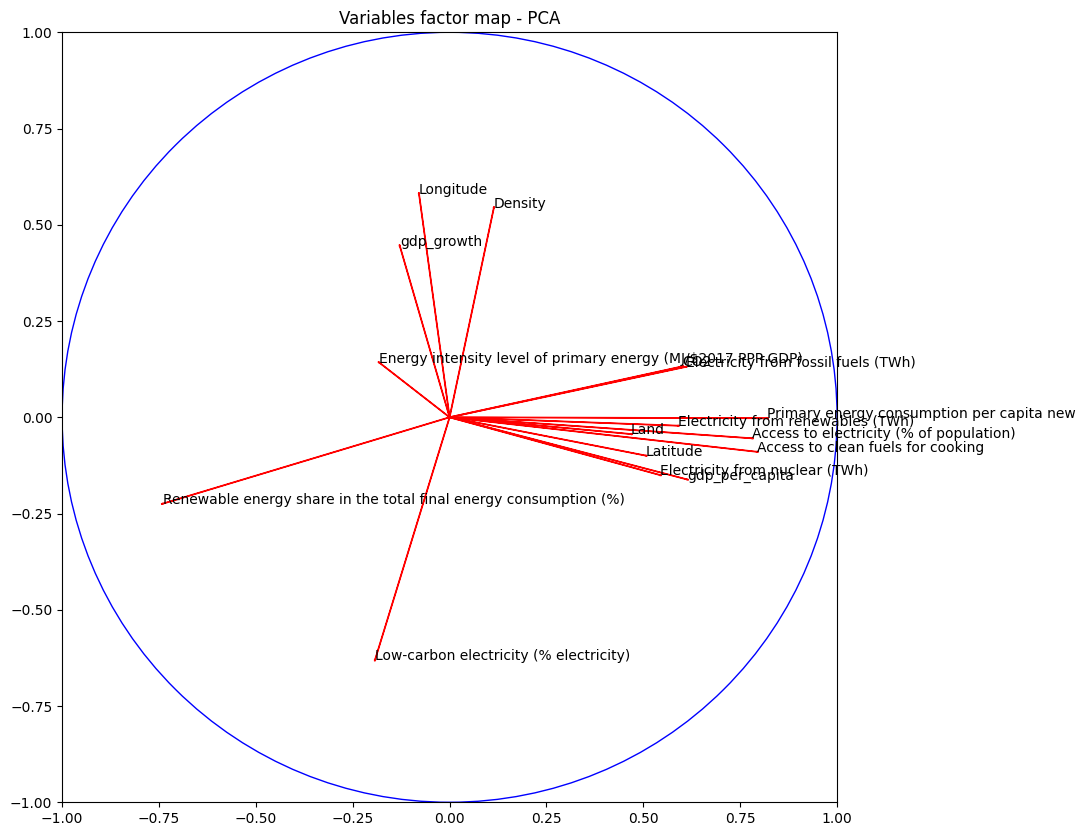

In [54]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data2_quanti.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()

## Question 8

C:\Users\romai\AppData\Local\Temp/ipykernel_80132/3313114022.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




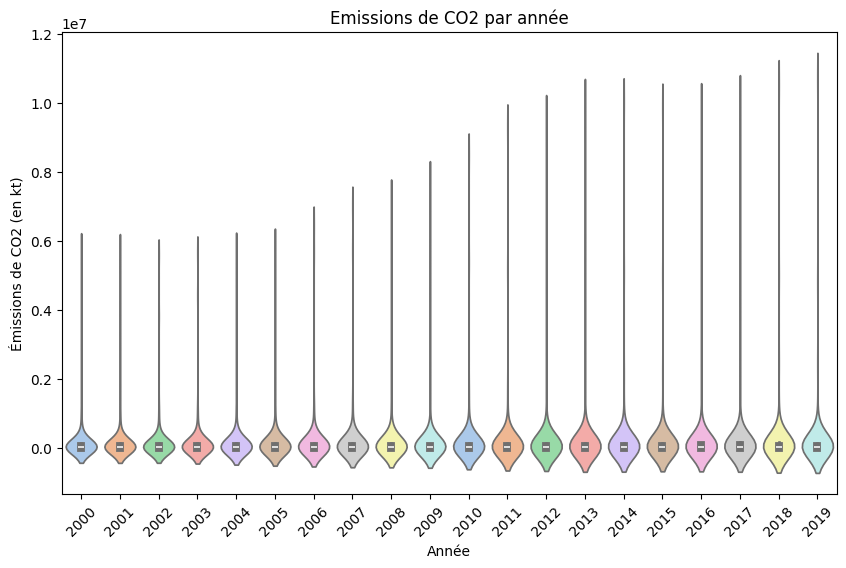

In [55]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='CO2', data=data2, palette='pastel')
plt.title('Emissions de CO2 par année')
plt.xlabel('Année')
plt.ylabel('Émissions de CO2 (en kt)')
plt.xticks(rotation=45)
plt.show()

In [56]:
fig=px.box(data2, x= 'Year', y='CO2')
fig.show()

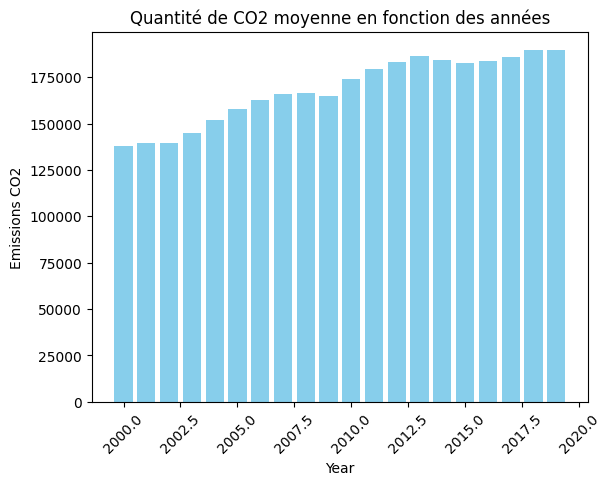

In [57]:
CO2_moy_year = data2.groupby('Year')['CO2'].mean().reset_index()


CO2_moy_year20 = CO2_moy_year.nsmallest(20, 'CO2')

plt.bar(CO2_moy_year20['Year'], CO2_moy_year20['CO2'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Emissions CO2')
plt.title('Quantité de CO2 moyenne en fonction des années')
plt.xticks(rotation=45)
plt.show()

In [58]:
#question 8:
CO2_max_year = data2.groupby('Year')['CO2'].max().reset_index()
CO2_max_year = CO2_max_year.sort_values(by='CO2', ascending=True)

CO2_max_year5=CO2_max_year.head(25)

fig = px.bar(
    CO2_max_year5,  
    x='Year',  
    y='CO2',  
    color='CO2',  
    title='CO2 en fonction des années',  
    labels={'Country': 'Year', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [60]:
model1 = ols('CO2 ~ Year', data=data2).fit()
print(model1.summary())


model2 = ols('CO2 ~ 1', data=data2).fit()

#on compare le model 1 au 2 en faisant une ANOVA
print(sm.stats.anova_lm(model2, model1))

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.06815
Date:                Mon, 27 May 2024   Prob (F-statistic):               1.00
Time:                        09:42:54   Log-Likelihood:                -43115.
No. Observations:                2868   AIC:                         8.627e+04
Df Residuals:                    2848   BIC:                         8.639e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.38e+05   7.01e+04      1.969   

On fait un test d'indépendance:

In [61]:
from scipy.stats import chi2_contingency


chi2_test = chi2_contingency(pd.crosstab(data2['CO2'], data2['Year']))
print(chi2_test)


model3 = ols('CO2 ~ Year + Entity', data=data2).fit()
print(model3.summary())


model4 = ols('CO2 ~ Entity', data=data2).fit()


print(sm.stats.anova_lm(model4, model3))

Chi2ContingencyResult(statistic=41100.85232804808, pvalue=0.14064536991497775, dof=40793, expected_freq=array([[0.09553696, 0.09623431, 0.09762901, ..., 0.10181311, 0.10181311,
        0.10181311],
       [0.2388424 , 0.24058577, 0.24407252, ..., 0.25453278, 0.25453278,
        0.25453278],
       [0.2388424 , 0.24058577, 0.24407252, ..., 0.25453278, 0.25453278,
        0.25453278],
       ...,
       [0.04776848, 0.04811715, 0.0488145 , ..., 0.05090656, 0.05090656,
        0.05090656],
       [0.04776848, 0.04811715, 0.0488145 , ..., 0.05090656, 0.05090656,
        0.05090656],
       [0.04776848, 0.04811715, 0.0488145 , ..., 0.05090656, 0.05090656,
        0.05090656]]))
                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     221.7
Da

On a une p-valeur de 0.15 > 0.05 donc on ne rejette pas H0. Ainsi : CO2 et Year sont indépendants.

# Partie 2 : Modélisation

### Question 1

In [62]:
data3 = data2.copy()
data3.drop(columns ='Electricity from fossil fuels (TWh)',inplace=True)

In [63]:
data3.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude', 'Primary energy consumption per capita new'],
      dtype='object')

Nous avons bien supprimé la variable 'Electricity from fossil fuels (TWh)', qui est très corrélée avec notre variable à prédire.

In [64]:
data3.dtypes

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2                                                                 float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
Density                                                               Int64
Land        

In [65]:
cols=[ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']
X = data3[cols]
y = data3['CO2']

In [66]:
X.head()

Access to electricity (% of population)  Access to clean fuels for cooking  \
3                                14.738506                               9.50   
4                                20.064968                              10.90   
5                                25.390894                              12.20   
6                                30.718690                              13.85   
7                                36.051010                              15.30   

   Renewable energy share in the total final energy consumption (%)  \
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  
7                                              28.78                  

   Electricity from nuclear (TWh)  Electricity from renewables (TWh)  \
3                             0.0                               0.63   
4                             0.0                               0.56   
5                             0.0                               0.59   
6                             0.0                               0.64   
7                             0.0                               0.75   

   Low-carbon electricity (% electricity)  \
3                               67.021280   
4                               62.921350   
5                               63.440857   
6                               76.190475   
7                               78.947370   

   Primary energy consumption per capita new  \
3                                   5.437941   
4                                   5.319253   
5                                   5.529703   
6                                   5.718411   
7                                   5.870087   

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
3                                               1.40              8.832278   
4                                               1.20              1.414118   
5                                               1.41             11.229715   
6                                               1.50              5.357403   
7                                               1.53             13.826320   

   gdp_per_capita  Density      Land  Latitude  Longitude  
3      190.683814       60  652230.0  33.93911  67.709953  
4      211.382074       60  652230.0  33.93911  67.709953  
5      242.031313       60  652230.0  33.93911  67.709953  
6      263.733602       60  652230.0  33.93911  67.709953  
7      359.693158       60  652230.0  33.93911  67.709953

On sépare notre jeu de données en jeu de données d'apprentissage et test :

In [67]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [68]:
train_data = pd.concat([X_train, y_train], axis=1)

In [69]:
data3.shape

(2868, 17)

In [70]:
X_train.shape

(2294, 14)

In [71]:
X_train.columns

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude'],
      dtype='object')

In [72]:
X_train.head

<bound method NDFrame.head of       Access to electricity (% of population)  \
2485                               100.000000   
2335                               100.000000   
858                                 99.521210   
811                                 99.563515   
2852                                52.587242   
...                                       ...   
2113                                36.362160   
1410                                 1.253706   
1446                                90.295815   
1640                               100.000000   
1139                                14.000000   

      Access to clean fuels for cooking  \
2485                              100.0   
2335                              100.0   
858                                93.5   
811                                93.6   
2852                                0.4   
...                                 ...   
2113                               42.7   
1410                                1

In [73]:
X_test.shape

(574, 14)

In [74]:
y_train.shape

(2294,)

In [75]:
y_train.name

'CO2'

In [76]:
y_test.shape

(574,)

### on construit un dataset d'apprentissage avec la variable Year

Nous choisissons de créer un autre dataset d'apprentissage, en y insluant la variable 'Year'. Nous choisissons de ne pas mettre la variable 'Entity', contenant trop peu d'observations par modalité. 

In [77]:
data_year = pd.read_csv("global-data-on-sustainable-energy (1).csv")

In [78]:
#data_year=data_year.dropna() 

In [79]:
data_year= data_year[['Year']]

In [81]:
data_year

Year
0     2000
1     2001
2     2002
3     2003
4     2004
...    ...
3644  2016
3645  2017
3646  2018
3647  2019
3648  2020

[3649 rows x 1 columns]

In [82]:
dataDum=pd.get_dummies(data_year['Year']).astype('Int64')
dfc=pd.concat([dataDum,data3],axis=1)
dfc.head()

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
0     1     0     0     0     0     0     0     0     0     0  ...   
1     0     1     0     0     0     0     0     0     0     0  ...   
2     0     0     1     0     0     0     0     0     0     0  ...   
3     0     0     0     1     0     0     0     0     0     0  ...   
4     0     0     0     0     1     0     0     0     0     0  ...   

   Low-carbon electricity (% electricity)  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                67.02128   
4                                62.92135   

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)          CO2  \
0                                                NaN                    NaN   
1                                                NaN                    NaN   
2                                                NaN                    NaN   
3                                                1.4            1220.000029   
4                                                1.2            1029.999971   

   gdp_growth  gdp_per_capita  Density      Land  Latitude  Longitude  \
0         NaN             NaN     <NA>       NaN       NaN        NaN   
1         NaN             NaN     <NA>       NaN       NaN        NaN   
2         NaN             NaN     <NA>       NaN       NaN        NaN   
3    8.832278      190.683814       60  652230.0  33.93911  67.709953   
4    1.414118      211.382074       60  652230.0  33.93911  67.709953   

   Primary energy consumption per capita new  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                   5.437941  
4                                   5.319253  

[5 rows x 38 columns]

In [83]:
dfc.columns

Index([                                                              2000,
                                                                     2001,
                                                                     2002,
                                                                     2003,
                                                                     2004,
                                                                     2005,
                                                                     2006,
                                                                     2007,
                                                                     2008,
                                                                     2009,
                                                                     2010,
                                                                     2011,
                                                                     2012,
                         

In [84]:
cols=[ 'Year','Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']
#years=['Year_2000', 'Year_2001', 'Year_2002','Year_2003',
       #'Year_2004', 'Year_2019']

#dfc['Year_2000', 'Year_2001', 'Year_2002','Year_2019', 'Year_2019']=dfc['Year_2000': 'Year_2019'].astype('integer')
y2 = dfc['CO2']
X2 = dfc.drop(columns=['CO2', 'Year', 'Entity'],inplace=True)

In [85]:
dfc

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
0        1     0     0     0     0     0     0     0     0     0  ...   
1        0     1     0     0     0     0     0     0     0     0  ...   
2        0     0     1     0     0     0     0     0     0     0  ...   
3        0     0     0     1     0     0     0     0     0     0  ...   
4        0     0     0     0     1     0     0     0     0     0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
3644     0     0     0     0     0     0     0     0     0     0  ...   
3645     0     0     0     0     0     0     0     0     0     0  ...   
3646     0     0     0     0     0     0     0     0     0     0  ...   
3647     0     0     0     0     0     0     0     0     0     0  ...   
3648     0     0     0     0     0     0     0     0     0     0  ...   

      Electricity from renewables (TWh)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                  0.63   
4                                  0.56   
...                                 ...   
3644                               3.32   
3645                               4.30   
3646                               5.46   
3647                               4.58   
3648                                NaN   

      Low-carbon electricity (% electricity)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                  67.021280   
4                                  62.921350   
...                                      ...   
3644                               48.680350   
3645                               58.503407   
3646                               59.412407   
3647                               55.582527   
3648                                     NaN   

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
0                                                   NaN                   NaN   
1                                                   NaN                   NaN   
2                                                   NaN                   NaN   
3                                                  1.40              8.832278   
4                                                  1.20              1.414118   
...                                                 ...                   ...   
3644                                              10.00              0.755869   
3645                                               9.51              4.709492   
3646                                               9.83              4.824211   
3647                                              10.47             -6.144236   
3648                                                NaN                   NaN   

      gdp_per_capita  Density      Land   Latitude  Longitude  \
0                NaN     <NA>       NaN        NaN        NaN   
1                NaN     <NA>       NaN        NaN        NaN   
2                NaN     <NA>       NaN        NaN        NaN   
3         190.683814       60  652230.0  33.939110  67.709953   
4         211.382074       60  652230.0  33.939110  67.709953   
...              ...      ...       ...        ...        ...   
3644     1464.588957       38  390757.0 -19.015438  29.154857   
3645     1235.189032       38  390757.0 -19.015438  29.154857   
3646     1254.642265       38  390757.0 -19.015438  29.154857   
3647     1316.740657       38  390757.0 -19.015438  29.154857   
3648             NaN     <NA>       NaN        NaN        NaN   

      Primary energy consumption per capita new  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                      5.437941  
4                              

In [86]:
dfc.dtypes

2000                                                                  Int64
2001                                                                  Int64
2002                                                                  Int64
2003                                                                  Int64
2004                                                                  Int64
2005                                                                  Int64
2006                                                                  Int64
2007                                                                  Int64
2008                                                                  Int64
2009                                                                  Int64
2010                                                                  Int64
2011                                                                  Int64
2012                                                                  Int64
2013        

In [87]:


np.random.seed(123)
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfc,y2, test_size=0.2, random_state=42)


On a bien divisé notre jeu de données en 80-20. Cette étape est primordiale car elle permet de diviser notre jeu de données en 80-20, et pour éviter le sur-ajustement (overfitting) cela permet à ce que le jeu de données test représente la majorité de la variance de notre jeu de données. Et cela nous permettra d'obtenir un bon modèle par validation croisée.

In [88]:
train_data_year= pd.concat([X_train2, y_train2], axis=1)

Pour pouvoir comparer les modèles, on créé une fonction qui permet de tracer les résidus avec une échelle fixe

In [89]:
def plot_res(x, y, title="titre"):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.xlim(0, 2500)
    plt.ylim(-1000, 1000)
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title(title)
    plt.axhline(y=0, color='green', linestyle='-')
    plt.show()

# Question 2

In [90]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor()
}

In [91]:

best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

  
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual Electricity'] = y_test
    submit['Predict_Electricity'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__
    
    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))
    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.79
Mean Absolute Error (MAE): 163432.25
Root Mean Squared Error (RMSE): 367873.79
   index  Actual Electricity  Predict_Electricity
0    573         2960.000038        180493.616660
1   3083       404200.012200        156245.819681
2   1005        40139.999390        -87385.895082
3    854        26690.000530        -51379.143518
4   3423         2019.999981        -90439.583561
----------------------------------------
Lasso:
R2 Score: 0.79
Mean Absolute Error (MAE): 163432.34
Root Mean Squared Error (RMSE): 367873.90
   index  Actual Electricity  Predict_Electricity
0    573         2960.000038        180493.738903
1   3083       404200.012200        156246.196836
2   1005        40139.999390        -87387.736700
3    854        26690.000530        -51379.404736
4   3423         2019.999981        -90442.234463
----------------------------------------
Ridge:
R2 Score: 0.79
Mean Absolute Error (MAE): 163433.68
Root Mean Squared Error (RMSE): 367874.69
   

In [92]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.dropna()

In [93]:
y_train = pd.to_numeric(y_train, errors='coerce')
y_train = y_train.dropna()

### Simple Linear Regression (Sans Year)

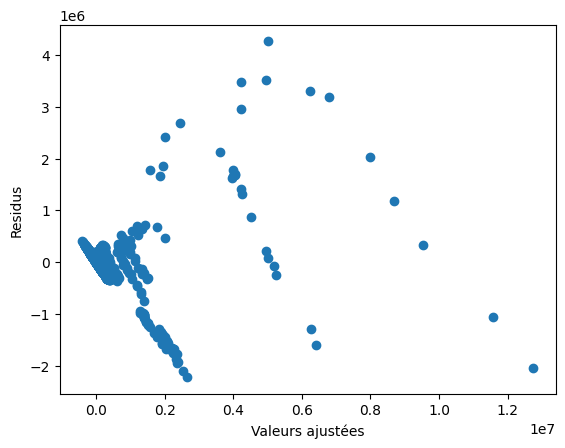

In [94]:
reg_lm = LinearRegression().fit(X_train, y_train)
fit_lm= reg_lm.predict(X_train)
residuals = y_train - fit_lm
plt.scatter(fit_lm, residuals)
plt.xlabel('Valeurs ajustées')
plt.ylabel('Residus')
plt.show()
#plot_res(x=y_pred, y=residuals, title="ANCOVA sans sélection de variables")

### Linear Regression Selection Using the BIC Criterion

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import numpy as np

In [96]:
# Nombre maximal de variables explicatives à considérer, ce sont les variables de notre dataset d'entrainement
max_features = len(X_train.columns)

# Initialisation du meilleur modèle et du BIC minimum
best_bic = np.inf
best_model = None

# Boucle pour essayer différentes combinaisons de variables explicatives
for k in range(1, max_features + 1):
    # Sélection des k meilleures variables explicatives avec RFE (Recursive Feature Elimination)
    selector = RFE(estimator=LinearRegression(), n_features_to_select=k)
    selector.fit(X_train, y_train)
    
    # Régression linéaire avec les variables sélectionnées
    model = LinearRegression().fit(selector.transform(X_train), y_train)
    
    # Calcul du BIC
    n = len(y_train)
    k = k + 1  # Intercept
    residual_sum_of_squares = np.sum((y_train - model.predict(selector.transform(X_train))) ** 2)
    bic = n * np.log(residual_sum_of_squares / n) + k * np.log(n)
    
    # Mise à jour du meilleur modèle si nécessaire
    if bic < best_bic:
        best_bic = bic
        best_model = model

In [97]:
# Interprétation du meilleur modèle
print("Meilleur modèle sélectionné avec BIC:", best_model)

Meilleur modèle sélectionné avec BIC: LinearRegression()


In [98]:
selected_feature_mask = selector.support_

# On obtient les noms des variables séléctionnées par le critère BIC contenues dans le train dataset
selected_feature_names = X_train.columns[selected_feature_mask]

# On affiche les noms des variables sélectionnées
print("Variables sélectionnées par le modèle BIC:")
for feature_name in selected_feature_names:
    print(feature_name)

Variables sélectionnées par le modèle BIC:
Access to electricity (% of population)
Access to clean fuels for cooking
Renewable energy share in the total final energy consumption (%)
Electricity from nuclear (TWh)
Electricity from renewables (TWh)
Low-carbon electricity (% electricity)
Primary energy consumption per capita new
Energy intensity level of primary energy (MJ/$2017 PPP GDP)
gdp_growth
gdp_per_capita
Density
Land
Latitude
Longitude


### Linear Regression using the Lasso penalization 

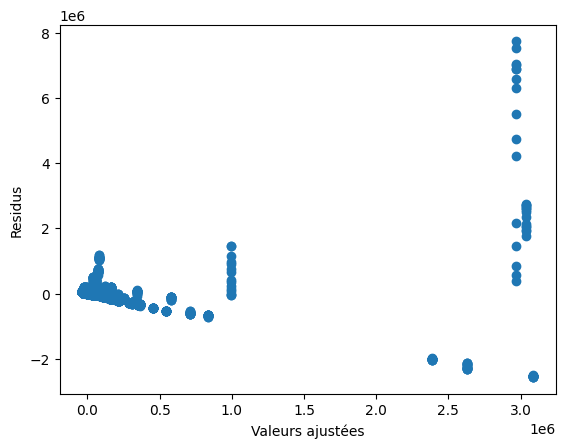

In [99]:
from sklearn.linear_model import LassoCV
reg_lasso = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
res_lasso = y_train - reg_lasso.predict(X_train)
fit_lasso = reg_lasso.predict(X_train)
plt.scatter(fit_lasso, res_lasso)
plt.xlabel('Valeurs ajustées')
plt.ylabel('Residus')
plt.show()

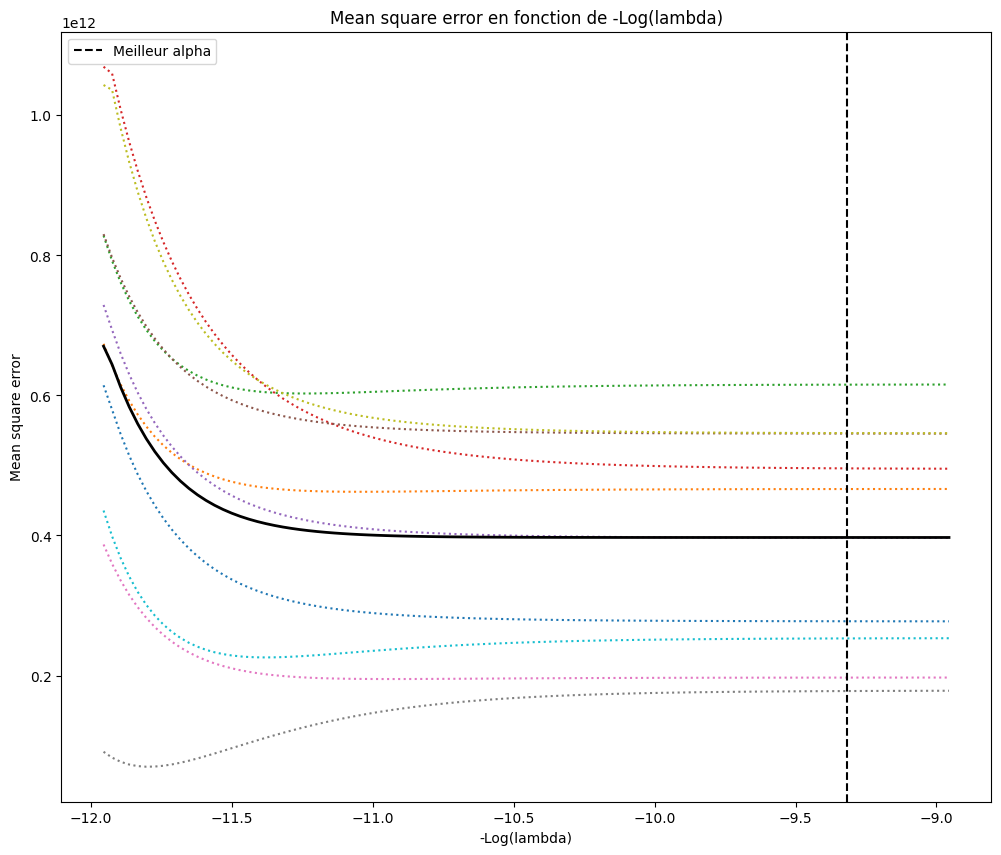

In [100]:
m_log_alphas = -np.log10(reg_lasso.alphas_)

plt.figure(figsize=(12, 10))
plt.plot(m_log_alphas, reg_lasso.mse_path_, ':')
plt.plot(m_log_alphas, reg_lasso.mse_path_.mean(axis=-1), 'k', linewidth=2)
plt.axvline(-np.log10(reg_lasso.alpha_), linestyle='--', color='k', label='Meilleur alpha')
plt.xlabel('-Log(lambda)')
plt.ylabel('Mean square error')
plt.title('Mean square error en fonction de -Log(lambda)')
plt.legend()
plt.show()


## SVM (sans year)

In [101]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

Nous implémentons nos hyperparamètres à optimiser : 

In [102]:
param_grid_gauss = {
    'C': [1, 10, 100,1000,5000],  #paramètre coût
        
    'gamma' : np.arange(0.1, 0.55, 0.05).tolist()  # pour le noyau gaussien 
}

Nous performons notre méthode SVM avec un noyau gaussien 

In [103]:
svm_reg_gauss = SVR(kernel='rbf')

In [104]:
svm_reg_gauss_tune = GridSearchCV(svm_reg_gauss, param_grid_gauss, cv=5)

In [105]:
svm_reg_gauss_tune.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000, 5000],
                         'gamma': [0.1, 0.15000000000000002,
                                   0.20000000000000004, 0.25000000000000006,
                                   0.30000000000000004, 0.3500000000000001,
                                   0.40000000000000013, 0.45000000000000007,
                                   0.5000000000000001]})

In [106]:
best_svm_reg_gauss = svm_reg_gauss_tune.best_estimator_

In [107]:
print("Best Model SVM with gaussian kernel:", best_svm_reg_gauss)

Best Model SVM with gaussian kernel: SVR(C=5000, gamma=0.1)


Puisque l'algorithme du SVM en noyau gaussien n'a pas pu converger en python, nous proposons de le traiter dans le notebook R.  

In [108]:
print("R2 score of the SVM model : ", best_svm_reg_gauss.score(X_train, y_train))

R2 score of the SVM model :  -0.03401466562467115


Tracé des résidus : 

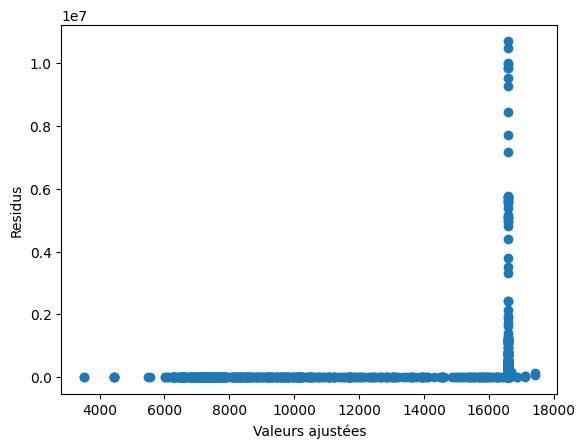

In [109]:
res_svmr = y_train - best_svm_reg_gauss.predict(X_train)
fit_svmr = best_svm_reg_gauss.predict(X_train)
plt.scatter(fit_svmr, res_svmr)
plt.xlabel('Valeurs ajustées')
plt.ylabel('Residus')
plt.show()

## Arbre de décision

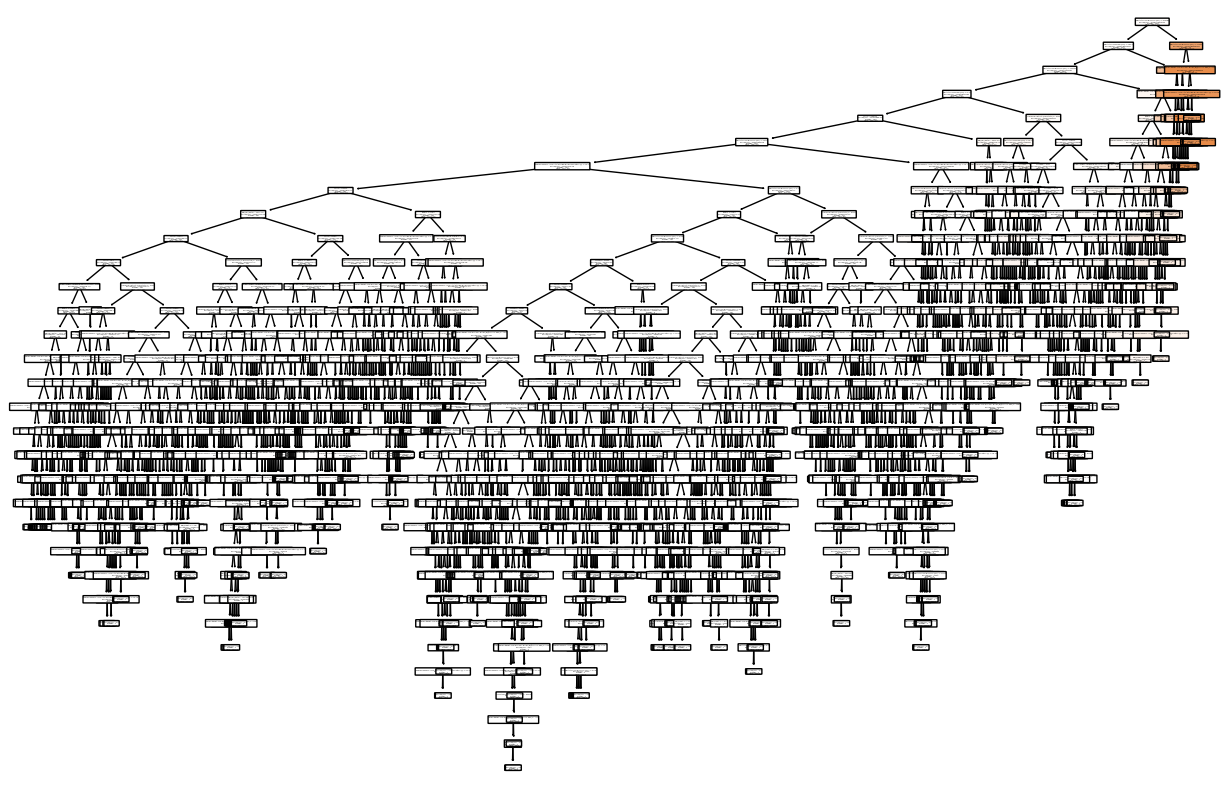

Best Parameter:  {'ccp_alpha': 0.01}


In [110]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

param_grid={'ccp_alpha':[0.00001,0.0001, 0.001,0.01,0.1]}

tree_reg= DecisionTreeRegressor()

tree_model = GridSearchCV(tree_reg, param_grid, cv=10)
tree_model.fit(X_train,y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree_model.best_estimator_, filled=True, rounded=True, feature_names=train_data.columns[:-1])
plt.show()

cv_errors = tree_model.cv_results_['mean_test_score']

best_param= tree_model.best_params_
print("Best Parameter: ", best_param)

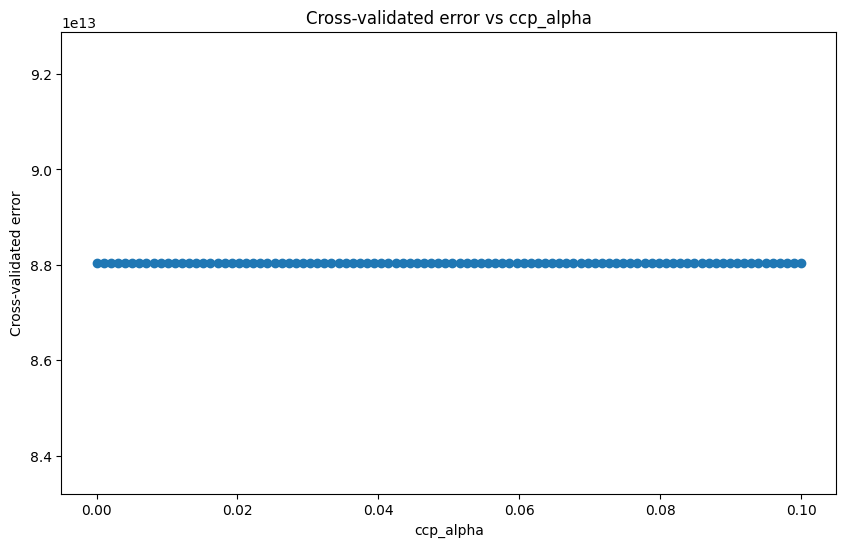

In [111]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(tree_model.best_estimator_, X_train, y_train, cv=10)

ccp_alphas = np.linspace(0.00001,0.1, 100)
CVerr = []

for alpha in ccp_alphas:
    tree_reg.set_params(ccp_alpha=alpha)
    errors= (predicted - y_train)**2
    CVerr.append(np.sum(errors))
    
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, CVerr, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Cross-validated error")
plt.title("Cross-validated error vs ccp_alpha")
plt.show()

In [112]:
min_error_index = np.argmin(CVerr)

optimal_ccp_alpha= ccp_alphas[min_error_index]
print("Optimal ccp_apha : ", optimal_ccp_alpha)

tree_opt_model = DecisionTreeRegressor(ccp_alpha=optimal_ccp_alpha)
tree_opt_model.fit(X_train, y_train)



Optimal ccp_apha :  1e-05


DecisionTreeRegressor(ccp_alpha=1e-05)

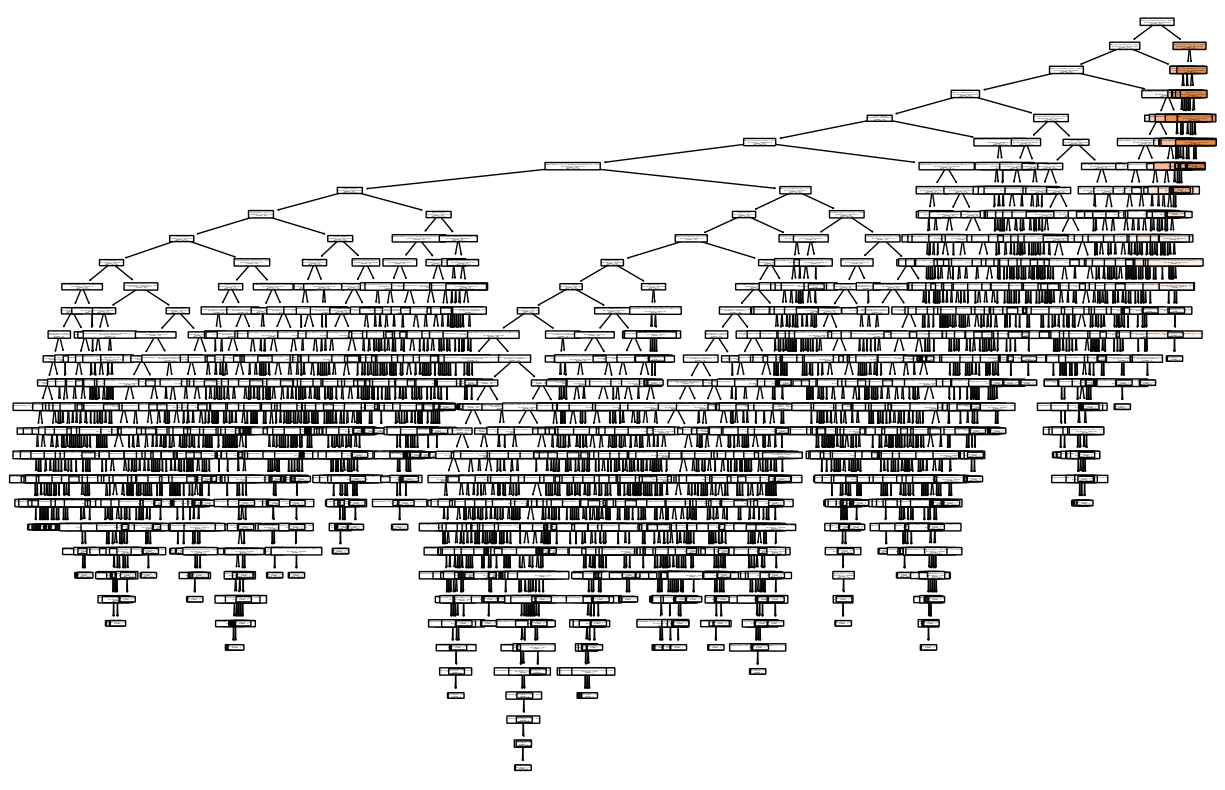

In [113]:
plt.figure(figsize=(15,10))
plot_tree(tree_opt_model, filled=True, rounded=True, feature_names=train_data.columns[:-1])
plt.show()

## Autre manière pour l'arbre de décision

In [114]:
required_columns = ['CO2'] + [col for col in train_data_year.columns if col != 'CO2']
missing_columns = [col for col in required_columns if col not in train_data_year.columns]



if missing_columns:
    raise KeyError(f"Les colonnes suivantes sont manquantes dans le DataFrame: {missing_columns}")


In [115]:
X_train2.columns = X_train2.columns.astype(str)

In [116]:
X_test2.columns = X_test2.columns.astype(str)

In [117]:
# Optimisation de la profondeur de l'arbre


param1=[{'ccp_alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]}]

param2=[{"max_depth":list(range(2,10))}]
tree_cv= GridSearchCV(DecisionTreeRegressor(),param1,cv=10,n_jobs=-1)
tree_model=tree_cv.fit(X_train, y_train)
tree_opt=tree_model.best_estimator_ 
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - tree_model.best_score_,tree_model.best_params_))

Meilleur score = 0.213090, Meilleur paramètre = {'ccp_alpha': 0.0001}


In [118]:
# Estimation de l'erreur de prévision
1-tree_opt.score(X_test,y_test)

0.02173991693742583

L'erreur sur la prévision est de 2,1 %.

In [119]:
X_train.columns

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude'],
      dtype='object')

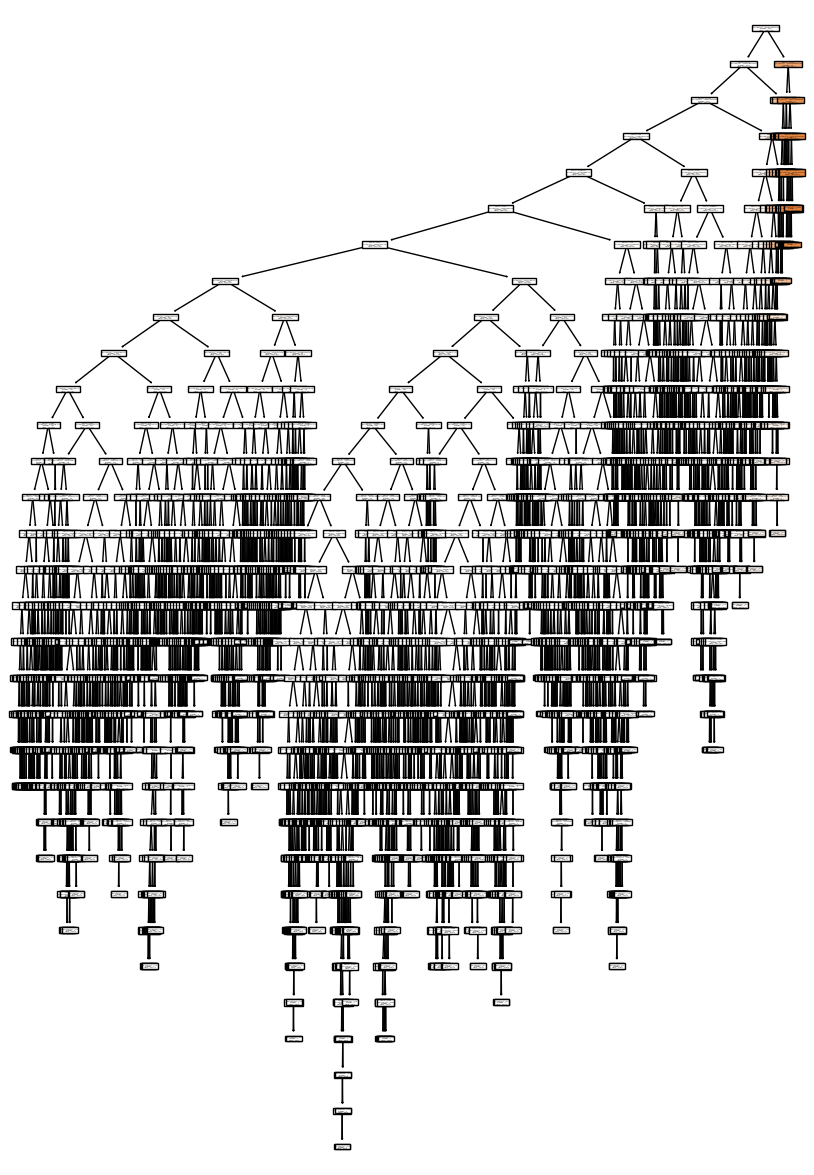

In [120]:
from sklearn import tree

plt.figure(figsize=(10, 15))
plot_tree(tree_opt, feature_names=train_data_year.columns.drop('CO2'), filled=True)
plt.show()

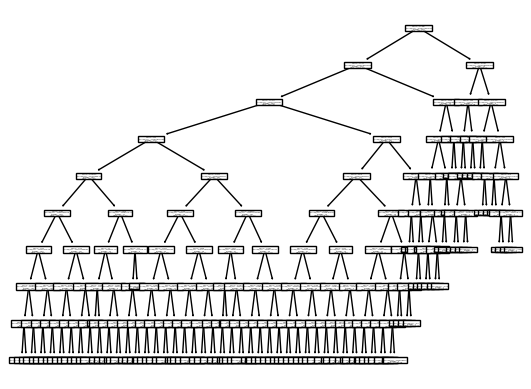

La profondeur optimale de l'arbre est :  9


In [121]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
param2=[{"max_depth":list(range(2,10))}]
tree2_cv= GridSearchCV(DecisionTreeRegressor(),param2,cv=10,n_jobs=-1)
tree2_Opt=tree2_cv.fit(X_train, y_train)

treeG2=DecisionTreeRegressor(max_depth=tree2_Opt.best_params_['max_depth'])
treeG2.fit(X_train,y_train)
plot_tree(treeG2,feature_names=dfc.columns.tolist());
plt.show()
print("La profondeur optimale de l'arbre est : " , tree2_Opt.best_params_['max_depth'])

On n'y voit pas grand chose sur ces arbres. Nous allons construire un graphe des importances des variables pour notre arbre. 

In [122]:
data4 = data2.copy()

In [123]:
data4.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude', 'Primary energy consumption per capita new'],
      dtype='object')

In [124]:
data4.drop(columns =['Electricity from fossil fuels (TWh)', 'CO2'],inplace=True)

In [125]:
data4.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude', 'Primary energy consumption per capita new'],
      dtype='object')

In [126]:
data4.head()

Entity  Year  Access to electricity (% of population)  \
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   
5  Afghanistan  2005                                25.390894   
6  Afghanistan  2006                                30.718690   
7  Afghanistan  2007                                36.051010   

   Access to clean fuels for cooking  \
3                               9.50   
4                              10.90   
5                              12.20   
6                              13.85   
7                              15.30   

   Renewable energy share in the total final energy consumption (%)  \
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  
7                                              28.78                  

   Electricity from nuclear (TWh)  Electricity from renewables (TWh)  \
3                             0.0                               0.63   
4                             0.0                               0.56   
5                             0.0                               0.59   
6                             0.0                               0.64   
7                             0.0                               0.75   

   Low-carbon electricity (% electricity)  \
3                               67.021280   
4                               62.921350   
5                               63.440857   
6                               76.190475   
7                               78.947370   

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
3                                               1.40              8.832278   
4                                               1.20              1.414118   
5                                               1.41             11.229715   
6                                               1.50              5.357403   
7                                               1.53             13.826320   

   gdp_per_capita  Density      Land  Latitude  Longitude  \
3      190.683814       60  652230.0  33.93911  67.709953   
4      211.382074       60  652230.0  33.93911  67.709953   
5      242.031313       60  652230.0  33.93911  67.709953   
6      263.733602       60  652230.0  33.93911  67.709953   
7      359.693158       60  652230.0  33.93911  67.709953   

   Primary energy consumption per capita new  
3                                   5.437941  
4                                   5.319253  
5                                   5.529703  
6                                   5.718411  
7                                   5.870087

Observons l'importance des variable en utilisant notre jeu de données avec la variable 'Year'.

In [127]:
tree_importances2 = pd.DataFrame(treeG2.feature_importances_, index=X.columns, columns=['Importance'])
tree_importances2.sort_values(by='Importance', ascending=False, inplace=True)
importances2 = treeG2.feature_importances_
indices = np.argsort(importances2)[::-1]
print(tree_importances2)


                                                    Importance
Electricity from renewables (TWh)                     0.726174
Electricity from nuclear (TWh)                        0.202380
Energy intensity level of primary energy (MJ/$2...    0.041324
Density                                               0.014537
Renewable energy share in the total final energ...    0.004410
Low-carbon electricity (% electricity)                0.004092
Land                                                  0.002690
gdp_per_capita                                        0.001647
Primary energy consumption per capita new             0.001264
Longitude                                             0.000817
Access to clean fuels for cooking                     0.000428
Access to electricity (% of population)               0.000184
gdp_growth                                            0.000037
Latitude                                              0.000016


In [128]:
tree_importances2.index

Index(['Electricity from renewables (TWh)', 'Electricity from nuclear (TWh)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Density',
       'Renewable energy share in the total final energy consumption (%)',
       'Low-carbon electricity (% electricity)', 'Land', 'gdp_per_capita',
       'Primary energy consumption per capita new', 'Longitude',
       'Access to clean fuels for cooking',
       'Access to electricity (% of population)', 'gdp_growth', 'Latitude'],
      dtype='object')

## Forêt Aléatoire

In [129]:
grid1 = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

In [130]:
rf_model= RandomForestRegressor(n_estimators=500, 
   criterion='squared_error', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='sqrt', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)



On calcule l'erreur out-of-bag :

In [131]:
rf_fit = rf_model.fit(X_train, y_train)

print(1-rf_fit.oob_score_)

0.005427813109426971


In [132]:

rf_fit_importances = pd.DataFrame(rf_fit.feature_importances_, index=X.columns, columns=['Importance'])
rf_fit_importances.sort_values(by='Importance', ascending=False, inplace=True)
importances = rf_fit.feature_importances_
indices = np.argsort(importances)[::-1]
print(rf_fit_importances)


                                                    Importance
Electricity from renewables (TWh)                     0.284169
Land                                                  0.249047
Electricity from nuclear (TWh)                        0.138742
Longitude                                             0.071621
Latitude                                              0.045493
Density                                               0.034474
Primary energy consumption per capita new             0.032601
Low-carbon electricity (% electricity)                0.031017
Renewable energy share in the total final energ...    0.030213
Access to clean fuels for cooking                     0.022418
Energy intensity level of primary energy (MJ/$2...    0.021205
gdp_per_capita                                        0.018744
gdp_growth                                            0.014229
Access to electricity (% of population)               0.006028


In [133]:
rf_fit_importances.index

Index(['Electricity from renewables (TWh)', 'Land',
       'Electricity from nuclear (TWh)', 'Longitude', 'Latitude', 'Density',
       'Primary energy consumption per capita new',
       'Low-carbon electricity (% electricity)',
       'Renewable energy share in the total final energy consumption (%)',
       'Access to clean fuels for cooking',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_per_capita', 'gdp_growth',
       'Access to electricity (% of population)'],
      dtype='object')

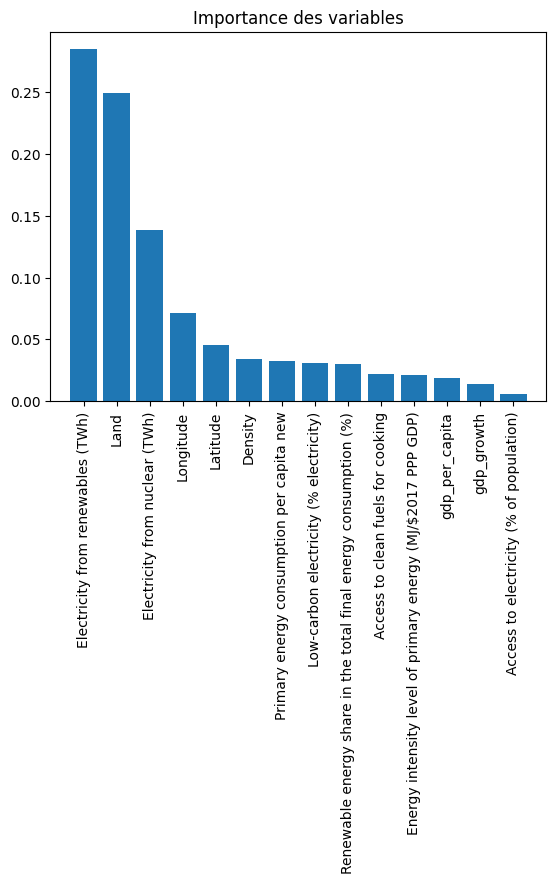

In [134]:
plt.figure()
plt.title("Importance des variables")
plt.bar( rf_fit_importances.index, rf_fit_importances['Importance'])
plt.xticks(rf_fit_importances.index)
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [135]:
print("R2 score of random forest : ", rf_fit.score(X_train, y_train))

R2 score of random forest :  0.9992953702776979


En compléxifiant nos paramètres, et par validation croisée :

In [136]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.008677, Meilleur paramètre = {'max_features': 3}


In [137]:
# erreur de prévision sur le test
1-rfOpt.score(X_test,y_test)

0.012499496776405272

In [138]:
best_rf = rfOpt.best_estimator_
rfOpt_importances = pd.DataFrame(best_rf.feature_importances_, index=X.columns.astype(str), columns=['Importance'])
rfOpt_importances.sort_values(by='Importance', ascending=False, inplace=True)

In [139]:
rfOpt_importances

Importance
Electricity from renewables (TWh)                     0.281722
Land                                                  0.245229
Electricity from nuclear (TWh)                        0.134894
Longitude                                             0.074704
Latitude                                              0.061667
Primary energy consumption per capita new             0.047224
Renewable energy share in the total final energ...    0.032835
Density                                               0.030569
Access to clean fuels for cooking                     0.026348
Low-carbon electricity (% electricity)                0.022602
gdp_per_capita                                        0.016863
Energy intensity level of primary energy (MJ/$2...    0.013182
gdp_growth                                            0.008388
Access to electricity (% of population)               0.003772

## Boosting

### Gradient Boosting Regression

In [140]:
pip install  lightgbm

Note: you may need to restart the kernel to use updated packages.Collecting lightgbm



   ---------------------------------------- 1.3/1.3 MB 7.8 MB/s eta 0:00:00


c:\Users\romai\miniconda3\lib\site-packages\lightgbm\engine.py:685: UserWarning:

Found 'n_estimators' in params. Will use it instead of 'num_boost_round' argument



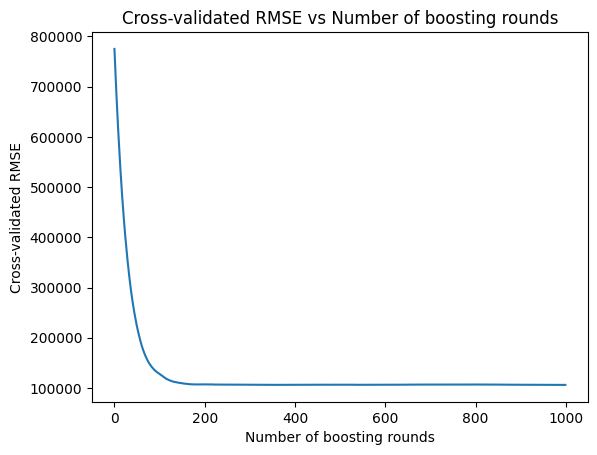

In [141]:
import lightgbm as lgb
from sklearn.model_selection import KFold

# Créons le dataset LightGBM
train_data_boost = lgb.Dataset(train_data.drop(columns='CO2'), label=train_data['CO2'])

# Nous définissons nos paramètres
param_boost2 = {
    'objective': 'regression',
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.03,
    'min_child_samples': 5,
    'verbose': -1
}

# Cross-validation avec LightGBM
cv_results = lgb.cv(
    param_boost2,
    train_data_boost,
    num_boost_round=1000,
    nfold=10,
    stratified=False,
    shuffle=True,
    metrics='rmse',
)

#print(cv_results)

# Tracer l'erreur de validation croisée
plt.plot(cv_results['valid rmse-mean'])
plt.xlabel('Number of boosting rounds')
plt.ylabel('Cross-validated RMSE')
plt.title('Cross-validated RMSE vs Number of boosting rounds')
plt.show()


In [142]:
param_boost = {
    
    'n_estimators': 1000,
    'learning_rate': [0.03],
    'min_child_samples': [5],
    'verbose': [-1]
}

In [143]:
#gbr_model=GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_boost, cv= 5)

In [144]:
#pip install lightgbm

In [145]:
import lightgbm as lgb
gbr_model = lgb.LGBMRegressor(**param_boost)

In [146]:
gbr_model.fit(X_train, y_train)

LGBMRegressor(learning_rate=[0.03], min_child_samples=[5], n_estimators=1000,
              verbose=[-1])

In [147]:
print("R2 score of cross-validated Gradient Boosting Regression model : ", gbr_model.score(X_train, y_train))

R2 score of cross-validated Gradient Boosting Regression model :  0.9999325529765878


##  Réseau de neurones

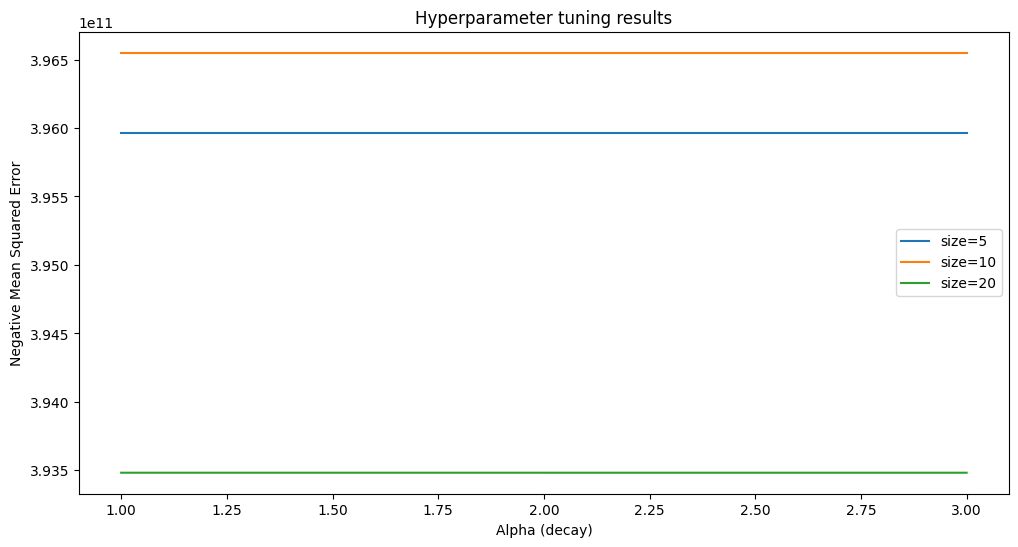

In [148]:
param_grid_mlp = {
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'alpha': [1, 2, 3],
    'max_iter': [500]
}

# Initialize the MLPRegressor
mlp = MLPRegressor(random_state=1, solver='adam')

# Set up GridSearchCV
nnet = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='neg_mean_squared_error')

# Fit the model
nnet.fit(X_train, y_train)

# Extract the results into a DataFrame
results = pd.DataFrame(nnet.cv_results_)

# Plot the results
plt.figure(figsize=(12, 6))

# Loop through the different hidden_layer_sizes and plot the results
for size in [(5,), (10,), (20,)]:
    subset = results[results['param_hidden_layer_sizes'] == size]
    plt.plot(subset['param_alpha'], -subset['mean_test_score'], label=f'size={size[0]}')

plt.xlabel('Alpha (decay)')
plt.ylabel('Negative Mean Squared Error')
plt.title('Hyperparameter tuning results')
plt.legend()
plt.show()

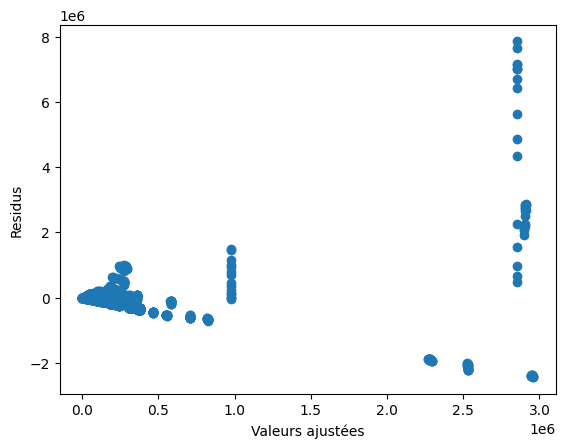

In [149]:
res_nnetr = y_train - nnet.predict(X_train)
fit_nnetr = nnet.predict(X_train)
plt.scatter(fit_nnetr, res_nnetr)
plt.xlabel('Valeurs ajustées')
plt.ylabel('Residus')
plt.show()

### Avec l'algorithme d'Adam

In [150]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV


nn_reg_adam = MLPRegressor(random_state=1,  max_iter=500, solver='adam').fit(X_train, y_train)

In [151]:
nn_r2_adam = nn_reg_adam.score(X_train, y_train)

In [152]:
print("R2 score for Neural Network with adam solver :", nn_r2_adam)

R2 score for Neural Network with adam solver : 0.4223898416060412


### Avec algorithme Stochastic Gradient Descent

In [153]:
nn_reg_sgd = MLPRegressor(random_state=1,  max_iter=500, solver='sgd').fit(X_train, y_train)

In [154]:
nn_r2_sgd = nn_reg_sgd.score(X_train, y_train)

In [155]:
print("R2 score for Neural Network with SGD solver :", nn_r2_sgd)

R2 score for Neural Network with SGD solver : -3.9251883885551585e+63


## Réseau de neurones avec Keras

In [156]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [157]:
model = Sequential()

# Ajout de la couche cachée
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Ajout d'une autre couche cachée 32 neurones
model.add(Dense(units=32, activation='relu'))

# Ajout de la couche de sortie
model.add(Dense(units=1, activation='linear'))

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

c:\Users\romai\miniconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 624971612160.0000 - val_loss: 338481381376.0000
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 413056335872.0000 - val_loss: 336362078208.0000
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 440686018560.0000 - val_loss: 335470002176.0000
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 330377134080.0000 - val_loss: 335409152000.0000
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 349064953856.0000 - val_loss: 335915745280.0000
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 456895561728.0000 - val_loss: 340762984448.0000
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322091384832.0000 - val_loss: 339401932800.0000
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 525428654080.0000 - val_loss: 336237101056.0000
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 434155192320.0000 - val_loss: 340724350976.0000
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

### Question 3

On prédit la variable CO2 selon le modèle. 

## Modèle de régression linéaire 

In [158]:
reg_lm_pred= reg_lm.predict(X_test)

In [159]:
r2_lm = r2_score(y_test, reg_lm_pred)
print("R2 modèle linéaire :", r2_lm)

R2 modèle linéaire : 0.7915582586970007


In [160]:
rmse_lm= np.sqrt(mean_squared_error(y_test, reg_lm_pred))
print("RMSE sur la prédiction du modèle linéaire:", rmse_lm)

RMSE sur la prédiction du modèle linéaire: 367873.78961513867


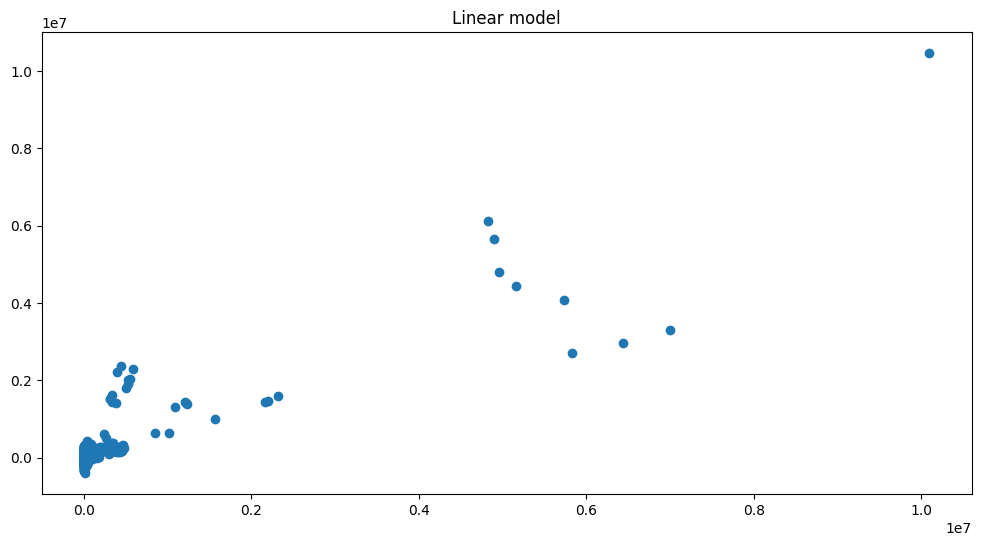

In [161]:
plt.figure(figsize=(12,6))
plt.title("Linear model")
plt.scatter(y_test, reg_lm_pred)
plt.show()

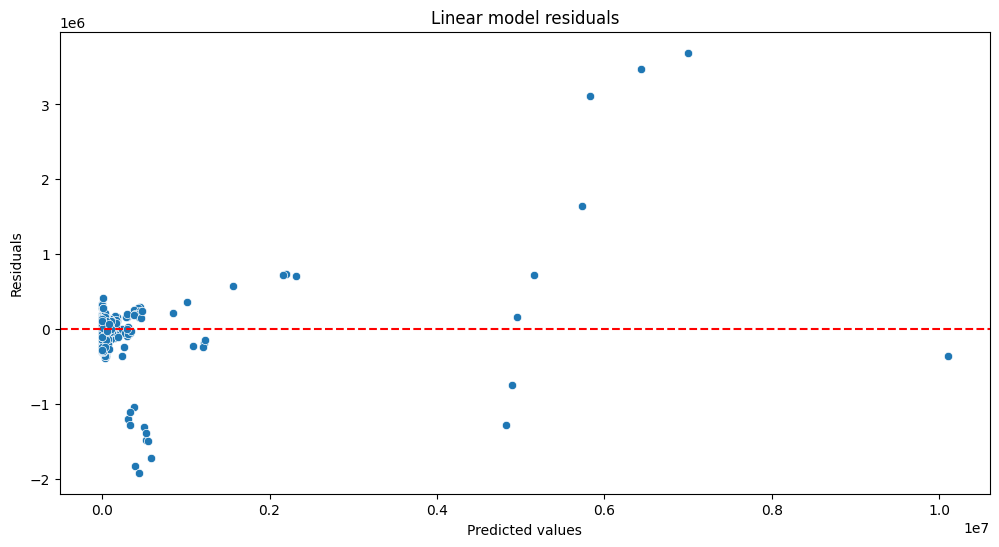

In [162]:
lm_residuals= y_test- reg_lm_pred

plt.figure(figsize=(12,6))
plt.title("Linear model residuals")
sns.scatterplot(x=y_test, y=lm_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Modèle de régression linéaire avec pénalisation Lasso

In [163]:
reg_lm_lasso_pred= reg_lasso.predict(X_test)

In [164]:
r2_lm = r2_score(y_test, reg_lm_lasso_pred)
print("R2 modèle linéaire avec pénalisation Lasso :", r2_lm)

R2 modèle linéaire avec pénalisation Lasso : 0.4861606866492215


In [165]:
rmse_lm_lasso= np.sqrt(mean_squared_error(y_test, reg_lm_lasso_pred))
print("RMSE sur la prédiction du modèle linéaire avec pénalisation Lasso:", rmse_lm_lasso)

RMSE sur la prédiction du modèle linéaire avec pénalisation Lasso: 577590.6632238502


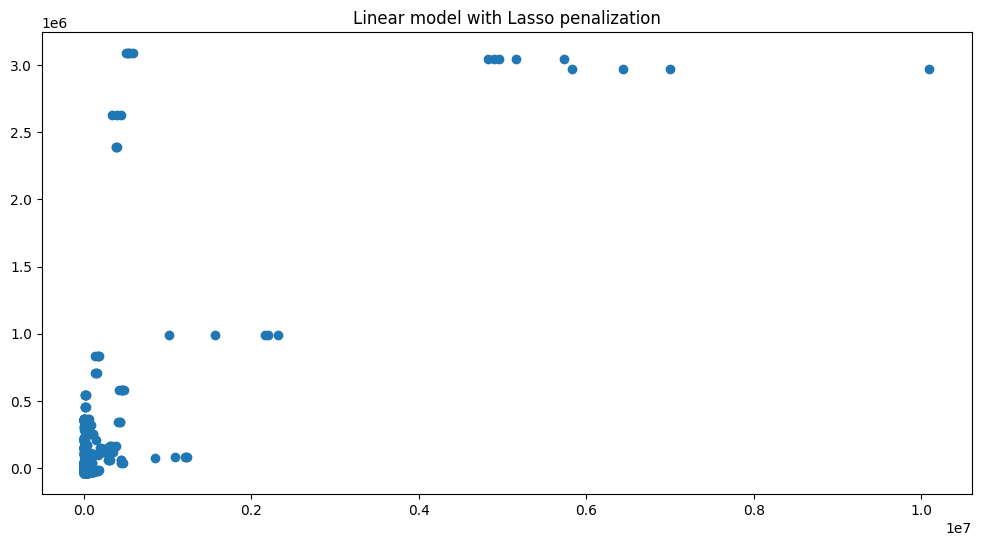

In [166]:
plt.figure(figsize=(12,6))
plt.title("Linear model with Lasso penalization")
plt.scatter(y_test, reg_lm_lasso_pred)
plt.show()

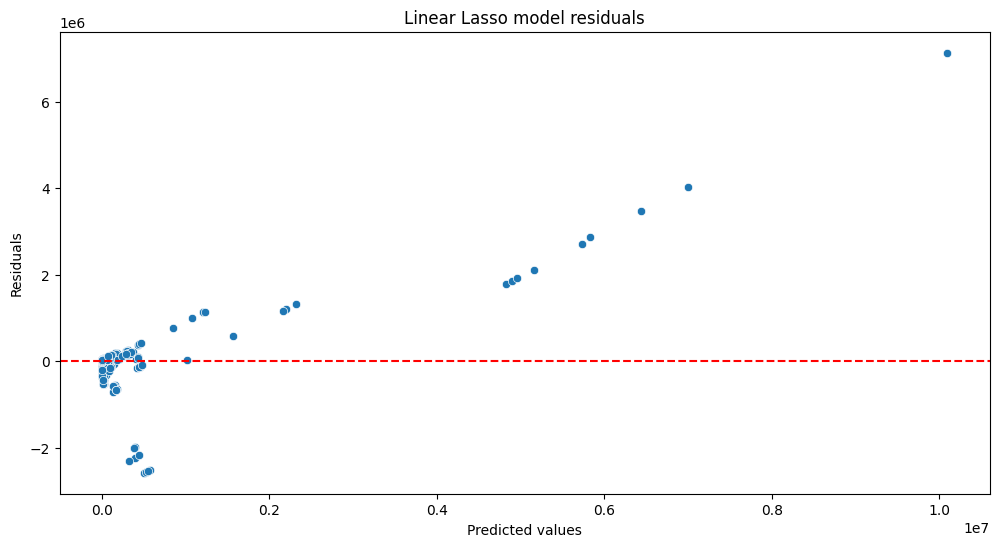

In [167]:
lm_lasso_residuals= y_test- reg_lm_lasso_pred

plt.figure(figsize=(12,6))
plt.title("Linear Lasso model residuals")
sns.scatterplot(x=y_test, y=lm_lasso_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Modèle SVM avec noyau gaussien

In [168]:
svm_reg_gauss_pred = best_svm_reg_gauss.predict(X_test)

In [169]:
r2_svm = r2_score(y_test, svm_reg_gauss_pred)
print("R2 modèle SVM avec noyau gaussien :", r2_svm)

R2 modèle SVM avec noyau gaussien : -0.03916380938076691


In [170]:
rmse_svm= np.sqrt(mean_squared_error(y_test, svm_reg_gauss_pred))
print("RMSE sur la prédiction du modèle linéaire avec pénalisation Lasso:", rmse_svm)

RMSE sur la prédiction du modèle linéaire avec pénalisation Lasso: 821388.2889496891


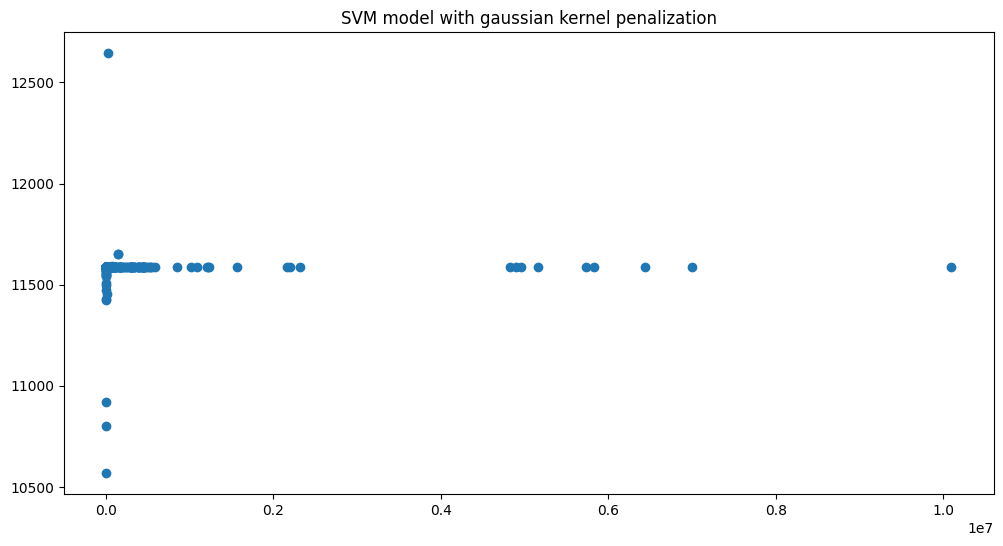

In [171]:
plt.figure(figsize=(12,6))
plt.title("SVM model with gaussian kernel penalization")
plt.scatter(y_test, svm_reg_gauss_pred)
plt.show()

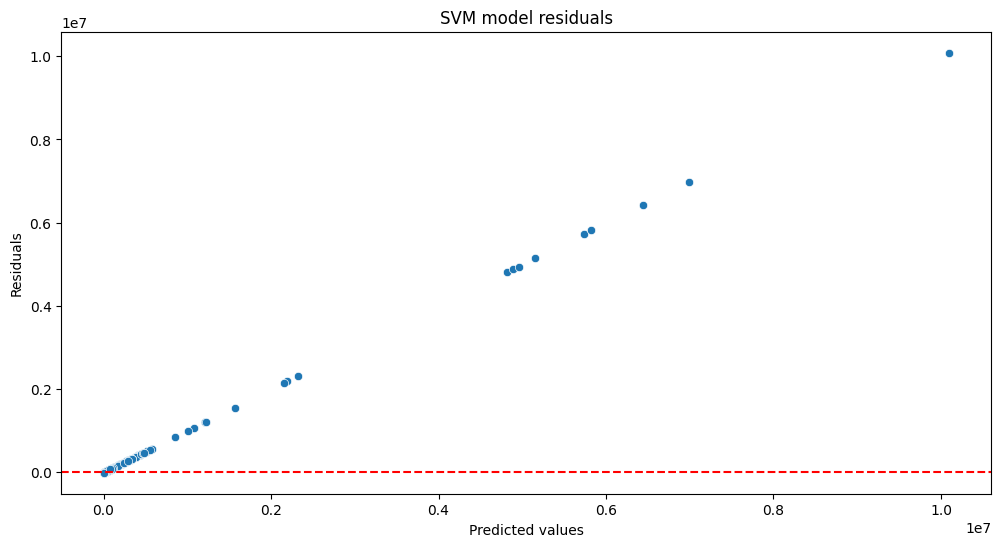

In [172]:
svm_residuals= y_test- svm_reg_gauss_pred

plt.figure(figsize=(12,6))
plt.title("SVM model residuals")
sns.scatterplot(x=y_test, y=svm_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Modèle arbre de décision

In [173]:
tree_opt_model_pred = treeG2.predict(X_test)

In [174]:
r2_tree = r2_score(y_test, tree_opt_model_pred)
print("R2 modèle Arbre de décision :", r2_tree)

R2 modèle Arbre de décision : 0.9774456138812531


In [175]:
rmse_tree= np.sqrt(mean_squared_error(y_test, tree_opt_model_pred))
print("RMSE sur la prédiction du GBR :", rmse_tree)

RMSE sur la prédiction du GBR : 121010.20744089365


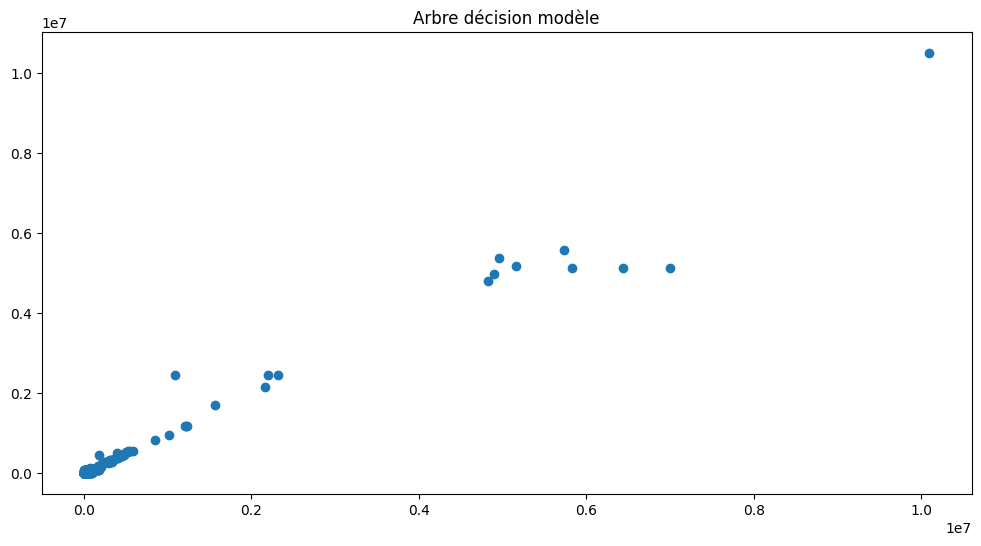

In [176]:
plt.figure(figsize=(12,6))
plt.title("Arbre décision modèle")
plt.scatter(y_test, tree_opt_model_pred)
plt.show()

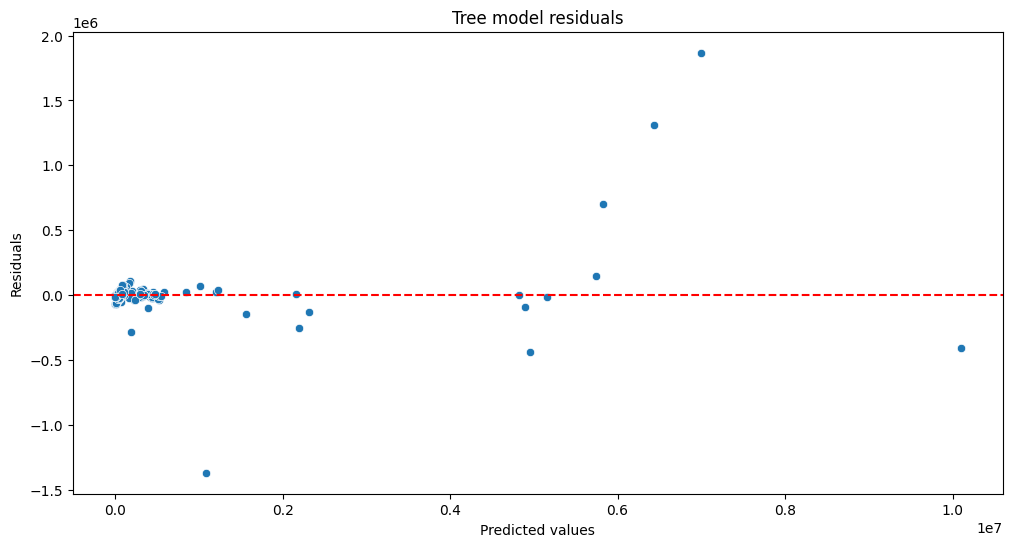

In [177]:
tree_residuals= y_test- tree_opt_model_pred

plt.figure(figsize=(12,6))
plt.title("Tree model residuals")
sns.scatterplot(x=y_test, y=tree_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Prédiction du modèle Boosting 

In [178]:
gbr_model_pred= gbr_model.predict(X_test)

In [179]:
r2_gbr_pred= r2_score(y_test, gbr_model_pred)
print("R2 score sur la prédiction du GBR :", r2_gbr_pred)

R2 score sur la prédiction du GBR : 0.9791361717029681


In [180]:
rmse_gbr= np.sqrt(mean_squared_error(y_test, gbr_model_pred))
print("RMSE sur la prédiction du GBR :", rmse_gbr)

RMSE sur la prédiction du GBR : 116386.73896511014


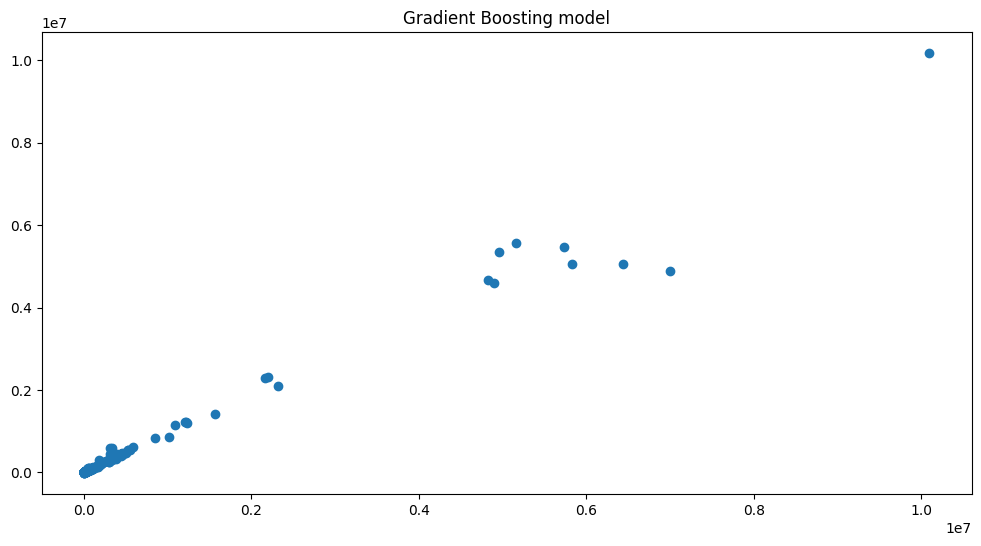

In [181]:
plt.figure(figsize=(12,6))
plt.title("Gradient Boosting model")
plt.scatter(y_test, gbr_model_pred)
plt.show()

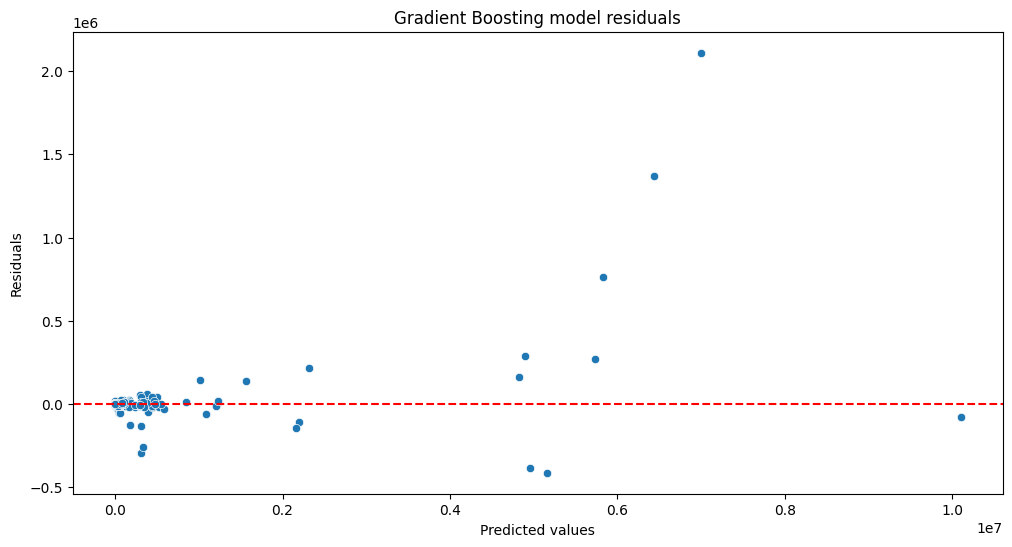

In [182]:
gbr_residuals= y_test- gbr_model_pred

plt.figure(figsize=(12,6))
plt.title("Gradient Boosting model residuals")
sns.scatterplot(x=y_test, y=gbr_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Réseau de neurones

In [183]:
nn_pred = nnet.predict(X_test)

In [184]:
rmse_nn= np.sqrt(mean_squared_error(y_test, nn_pred))
print("RMSE sur la prédiction du Neural Network :", rmse_nn)

RMSE sur la prédiction du Neural Network : 577713.827808241


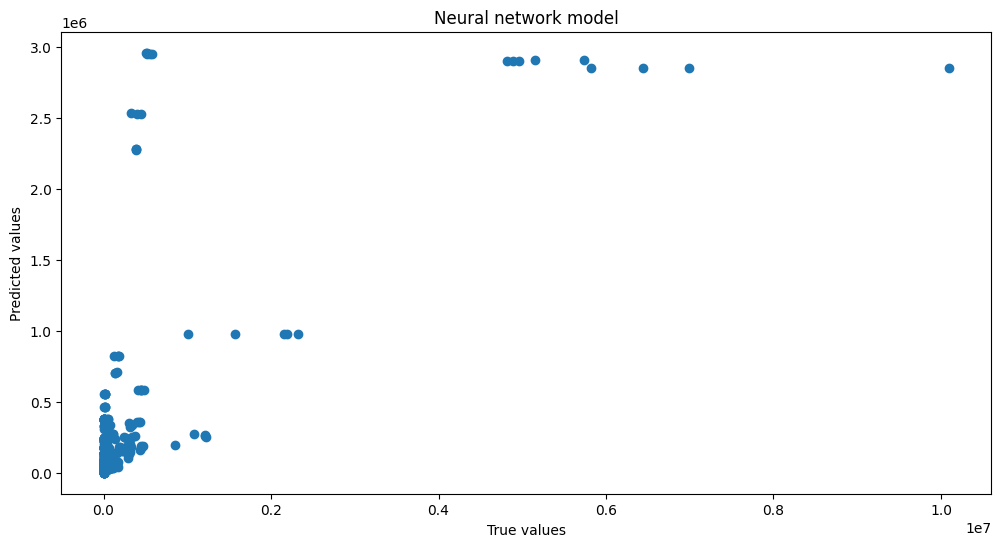

In [185]:
plt.figure(figsize=(12,6))
plt.title("Neural network model")
plt.scatter(y_test, nn_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

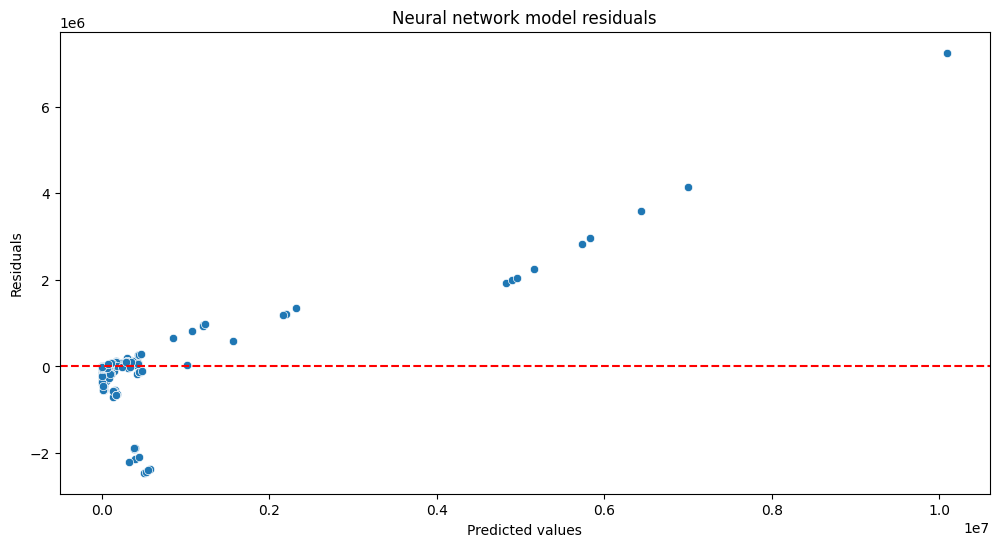

In [186]:
nn_residuals= y_test- nn_pred

plt.figure(figsize=(12,6))
plt.title("Neural network model residuals")
sns.scatterplot(x=y_test, y=nn_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Forêt aléatoire

In [187]:
forest_pred=rf_fit.predict(X_test)

In [188]:
rmse_rf= np.sqrt(mean_squared_error(y_test, forest_pred))
print("RMSE sur la prédiction de la forêt aléatoire :", rmse_rf)

RMSE sur la prédiction de la forêt aléatoire : 95103.39971359308


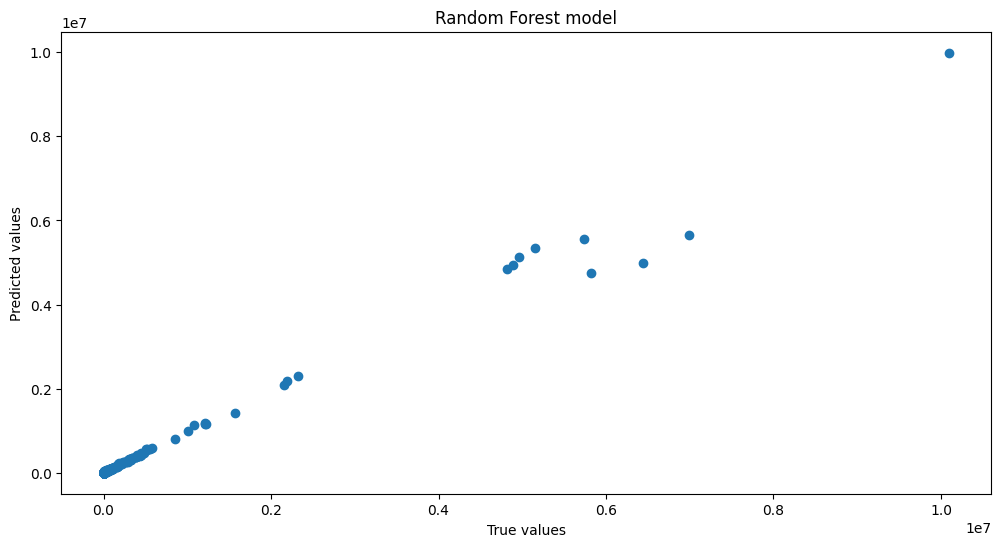

In [189]:
plt.figure(figsize=(12,6))
plt.title("Random Forest model")
plt.scatter(y_test, forest_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

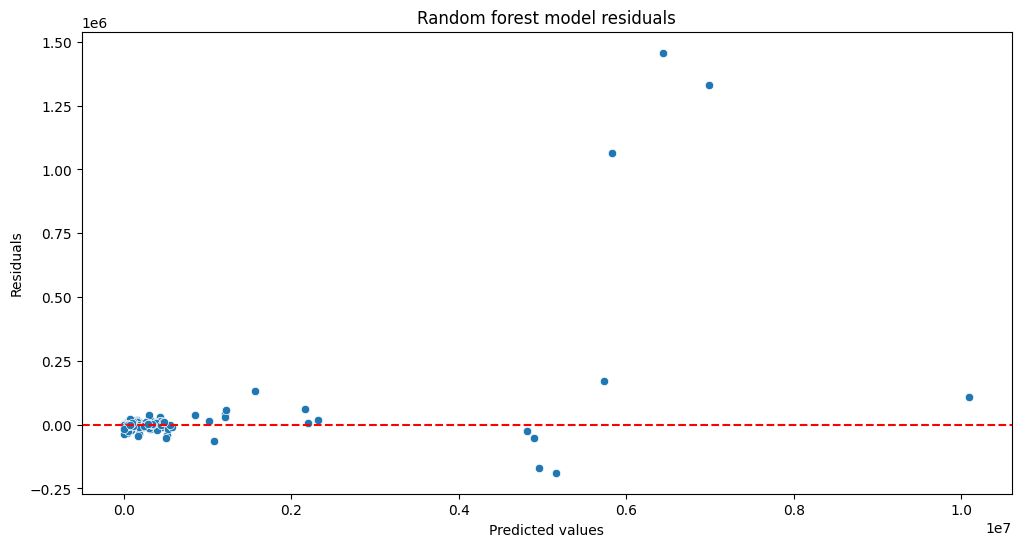

In [190]:
rf_residuals= y_test- forest_pred

plt.figure(figsize=(12,6))
plt.title("Random forest model residuals")
sns.scatterplot(x=y_test, y=rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Question 4

On affiche les variables les plus importantes de notre modèle random forest : 

In [191]:
rf_model_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
rf_model_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(rf_model_importances)

                                                    Importance
Electricity from renewables (TWh)                     0.284169
Land                                                  0.249047
Electricity from nuclear (TWh)                        0.138742
Longitude                                             0.071621
Latitude                                              0.045493
Density                                               0.034474
Primary energy consumption per capita new             0.032601
Low-carbon electricity (% electricity)                0.031017
Renewable energy share in the total final energ...    0.030213
Access to clean fuels for cooking                     0.022418
Energy intensity level of primary energy (MJ/$2...    0.021205
gdp_per_capita                                        0.018744
gdp_growth                                            0.014229
Access to electricity (% of population)               0.006028


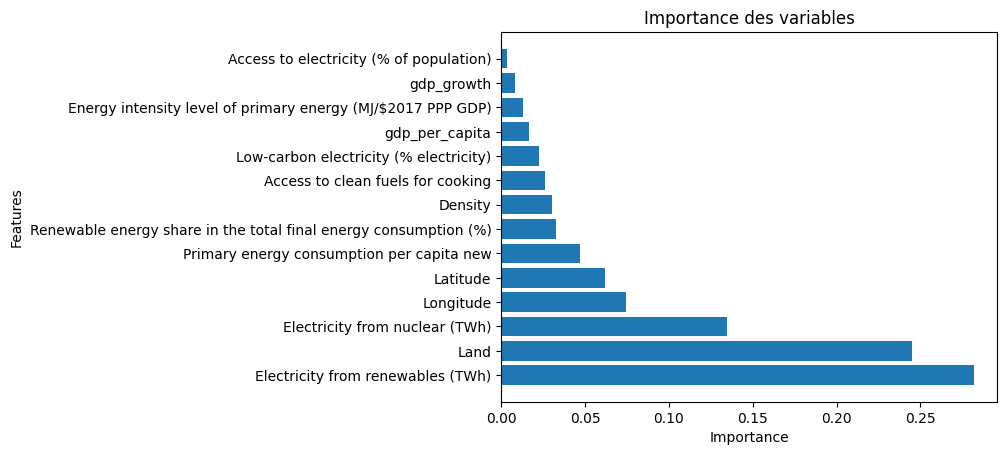

In [192]:
plt.figure()
plt.title("Importance des variables")
plt.barh(rfOpt_importances.index, rfOpt_importances['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [193]:
rf_model_importances.shape

(14, 1)

In [194]:
rf_model_importances.index


Index(['Electricity from renewables (TWh)', 'Land',
       'Electricity from nuclear (TWh)', 'Longitude', 'Latitude', 'Density',
       'Primary energy consumption per capita new',
       'Low-carbon electricity (% electricity)',
       'Renewable energy share in the total final energy consumption (%)',
       'Access to clean fuels for cooking',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_per_capita', 'gdp_growth',
       'Access to electricity (% of population)'],
      dtype='object')

En effet, Electricity from renewables est la plus importante dans notre modèle.

### Pour le modèle d'arbre de décrision

In [195]:
tree_opt_model_importances = pd.DataFrame(tree_opt_model.feature_importances_, index=X.columns, columns=['Importance'])
tree_opt_model_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(tree_opt_model_importances)

                                                    Importance
Electricity from renewables (TWh)                     0.725781
Electricity from nuclear (TWh)                        0.204350
Energy intensity level of primary energy (MJ/$2...    0.035301
Longitude                                             0.014891
Low-carbon electricity (% electricity)                0.009670
Renewable energy share in the total final energ...    0.004045
Land                                                  0.002864
Primary energy consumption per capita new             0.001539
Density                                               0.000577
gdp_growth                                            0.000472
gdp_per_capita                                        0.000402
Access to electricity (% of population)               0.000058
Access to clean fuels for cooking                     0.000048
Latitude                                              0.000002


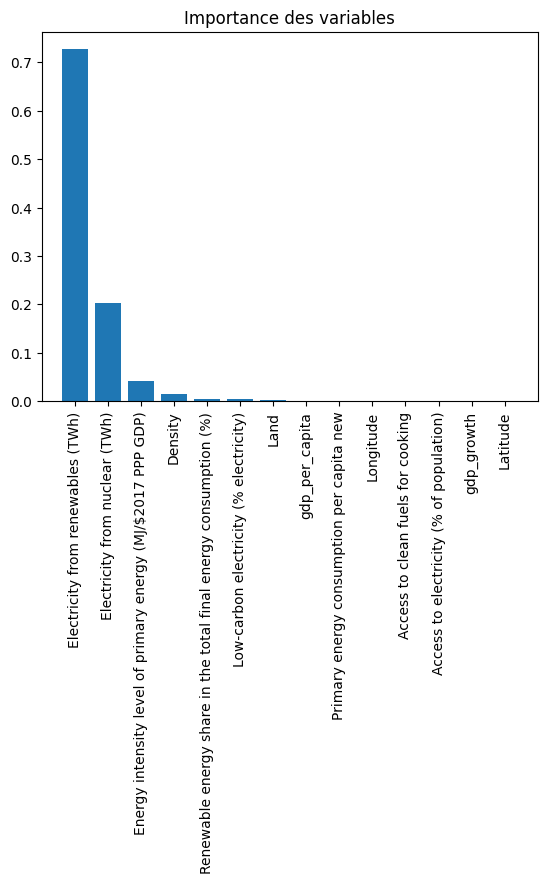

In [196]:
plt.figure()
plt.title("Importance des variables")
plt.bar( tree_importances2.index, tree_importances2['Importance'])
plt.xticks(tree_importances2.index)
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Question 5

On se crée un nouveau jeu de données pour pour remplacer les données manquantes.

In [197]:
data5=data.copy()
data5.drop(columns =['Electricity from fossil fuels (TWh)'],inplace=True)

In [198]:
data5.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude'],
      dtype='object')

In [199]:
data5.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from nuclear (TWh)  Electricity from renewables (TWh)  \
0                             0.0                               0.31   
1                             0.0                               0.50   
2                             0.0                               0.56   
3                             0.0                               0.63   
4                             0.0                               0.56   

   Low-carbon electricity (% electricity)  \
0                               65.957440   
1                               84.745766   
2                               81.159424   
3                               67.021280   
4                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)          CO2  \
0                                               1.64             760.000000   
1                                               1.74             730.000000   
2                                               1.40            1029.999971   
3                                               1.40            1220.000029   
4                                               1.20            1029.999971   

   gdp_growth  gdp_per_capita  Density      Land  Latitude  Longitude  
0         NaN             NaN       60  652230.0  33.93911  67.709953  
1         NaN             NaN       60  652230.0  33.93911  67.709953  
2         NaN      179.426579       60  652230.0  33.93911  67.709953  
3    8.832278      190.683814       60  652230.0  33.93911  67.709953  
4    1.414118      211.382074       60  652230.0  33.93911  67.709953

In [200]:
missing_values

NameError: name 'missing_values' is not defined

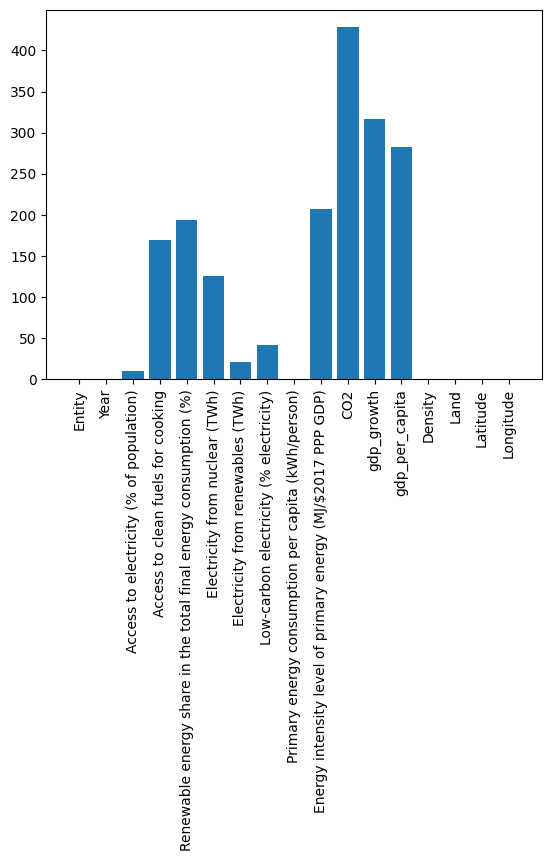

In [ ]:
missing_values = data5.isna().sum()

plt.bar(missing_values.index,missing_values.values)
#fig = px.bar(x=missing_values.index, y=missing_values.values, labels={'x': 'Columns', 'y': 'Missing Values Count'},
             #title='Count of Missing Values in Each Column')
plt.xticks(rotation=90)
plt.show()

On remarque bien l'abscence des 3 variables qui possédaient beaucoup de données manquantes dans le jeu de données brut. 

In [ ]:
data5.drop(columns =['Entity'],inplace=True)

In [ ]:
data5.drop(columns =['Year'],inplace=True)

In [ ]:
data5_mean = data5.mean()

In [ ]:
data5_mean

Year                                                                  2010.038367
Access to electricity (% of population)                                 78.933702
Access to clean fuels for cooking                                       63.255287
Renewable energy share in the total final energy consumption (%)        32.638165
Electricity from nuclear (TWh)                                           13.45019
Electricity from renewables (TWh)                                        23.96801
Low-carbon electricity (% electricity)                                  36.801182
Primary energy consumption per capita (kWh/person)                   25743.981745
Energy intensity level of primary energy (MJ/$2017 PPP GDP)              5.307345
CO2                                                                 159866.462686
gdp_growth                                                                3.44161
gdp_per_capita                                                       13283.774348
Density         

In [ ]:
data5['Density']= data5['Density'].astype('float64')

In [ ]:
data5.dtypes

Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2                                                                 float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
Density                                                             float64
Land        

In [ ]:
numeric_columns = data5.select_dtypes(include=[np.number]).columns

In [ ]:
for col in numeric_columns:
    data5[col].fillna(data5[col].mean(), inplace=True)

C:\Users\aboui\AppData\Local\Temp\ipykernel_4312\3460052860.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
#Mean_Access = data5['Access to clean fuels for cooking'].mean()
#Mean_Renewable = data5['Renewable energy share in the total final energy consumption (%)'].mean()
#Mean_Electricity = data5['Electricity from nuclear (TWh)'].mean()
#Mean_Energy = data5['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean()
#Mean_co2 = data5['CO2'].mean()
#Mean_gdp_growth = data5['gdp_growth'].mean()
#Mean_gdp_per_capita = data5['gdp_per_capita'].mean()

In [ ]:
#data5['Access to clean fuels for cooking'].fillna(Mean_Access, inplace=True)
#data5['Renewable energy share in the total final energy consumption (%)'].fillna(Mean_Renewable, inplace=True)
#data5['Electricity from nuclear (TWh)'].fillna(Mean_Electricity, inplace=True)
#data5['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(Mean_Energy, inplace=True)
#data5['CO2'].fillna(Mean_co2, inplace=True)
#data5['gdp_growth'].fillna(Mean_gdp_growth, inplace=True)
#data5['gdp_per_capita'].fillna(Mean_gdp_per_capita, inplace=True)

In [ ]:
data5.columns

Index(['Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude'],
      dtype='object')

On construit nos jeux de données d'apprentissage et test :

In [ ]:
cols=[ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
        'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']
X_bis = data5[cols]
y_bis = data5['CO2']

In [ ]:
np.random.seed(123)
X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(X_bis,y_bis, test_size=0.2, random_state=42)

In [ ]:
train_data_mis = pd.concat([X_train_bis, y_train_bis], axis=1)

Nous allons maintenant comparer les performances du Boosting, du Random Forest, et des arbres. 

### Boosting

#### Training :

In [ ]:
grid2 = { 
    'n_estimators': [50,100,200], 
    'criterion' : ['squared_error'],
    'random_state' : [18]
}

In [ ]:
gbr_model2=GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=grid2, cv= 5)

In [ ]:
gbr_model2.fit(X_train_bis, y_train_bis)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'n_estimators': [50, 100, 200], 'random_state': [18]})

#### Prédiction :

In [ ]:
gbr_model2_pred= gbr_model2.predict(X_test_bis)

In [ ]:
r2_gbr2_pred= r2_score(y_test_bis, gbr_model2_pred)
print("R2 score sur la prédiction du GBR :", r2_gbr2_pred)

R2 score sur la prédiction du GBR : 0.985951241561132


In [ ]:
rmse_gbr2= np.sqrt(mean_squared_error(y_test_bis, gbr_model2_pred))
print("RMSE sur la prédiction du GBR :", rmse_gbr2)

RMSE sur la prédiction du GBR : 63164.54760278309


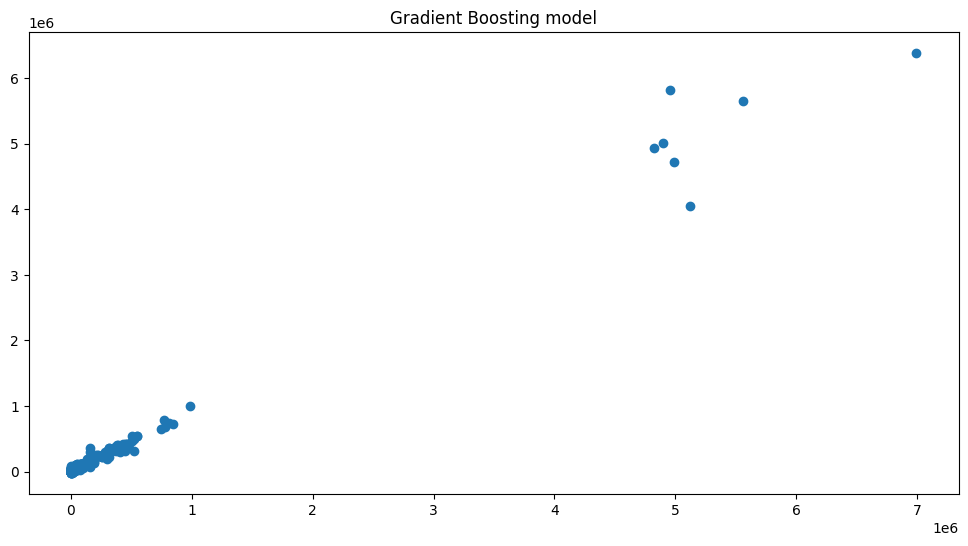

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Gradient Boosting model")
plt.scatter(y_test_bis, gbr_model2_pred)
plt.show()

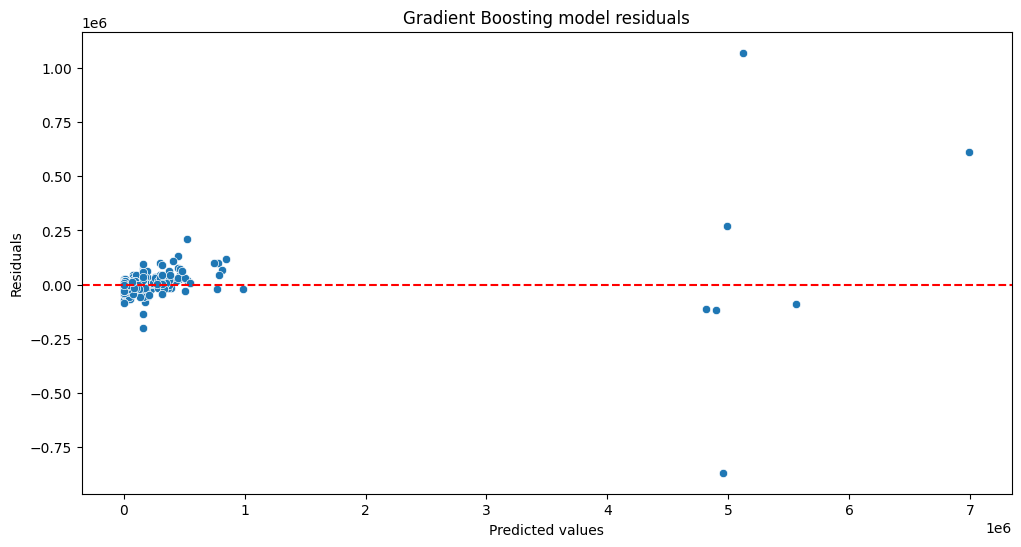

In [ ]:
gbr2_residuals= y_test_bis- gbr_model2_pred

plt.figure(figsize=(12,6))
plt.title("Gradient Boosting model residuals")
sns.scatterplot(x=y_test_bis, y=gbr2_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Random Forest

In [ ]:
grid1 = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

In [ ]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        grid1,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_train_bis, y_train_bis)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.055703, Meilleur paramètre = {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}


In [ ]:
# erreur de prévision sur le test
1-rfOpt.score(X_test_bis,y_test_bis)

0.01154138567575358

In [ ]:
best_rf = rfOpt.best_estimator_
rfOpt_importances_mis = pd.DataFrame(best_rf.feature_importances_, index=X_bis.columns.astype(str), columns=['Importance'])
rfOpt_importances_mis.sort_values(by='Importance', ascending=False, inplace=True)

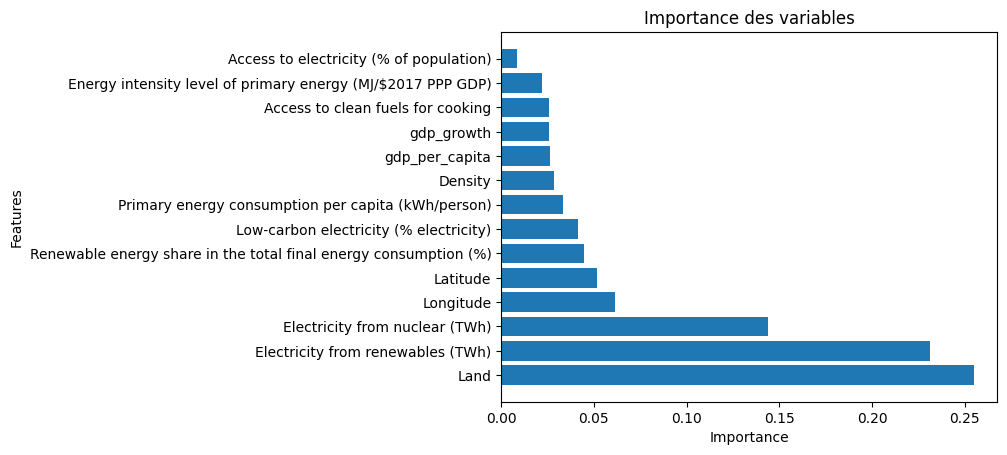

In [ ]:
plt.figure()
plt.title("Importance des variables")
plt.barh(rfOpt_importances_mis.index, rfOpt_importances['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
forest_pred2=best_rf.predict(X_test_bis)

In [ ]:
rmse_rf= np.sqrt(mean_squared_error(y_test_bis, forest_pred2))
print("RMSE sur la prédiction de la forêt aléatoire :", rmse_rf)

RMSE sur la prédiction de la forêt aléatoire : 57251.04186126177


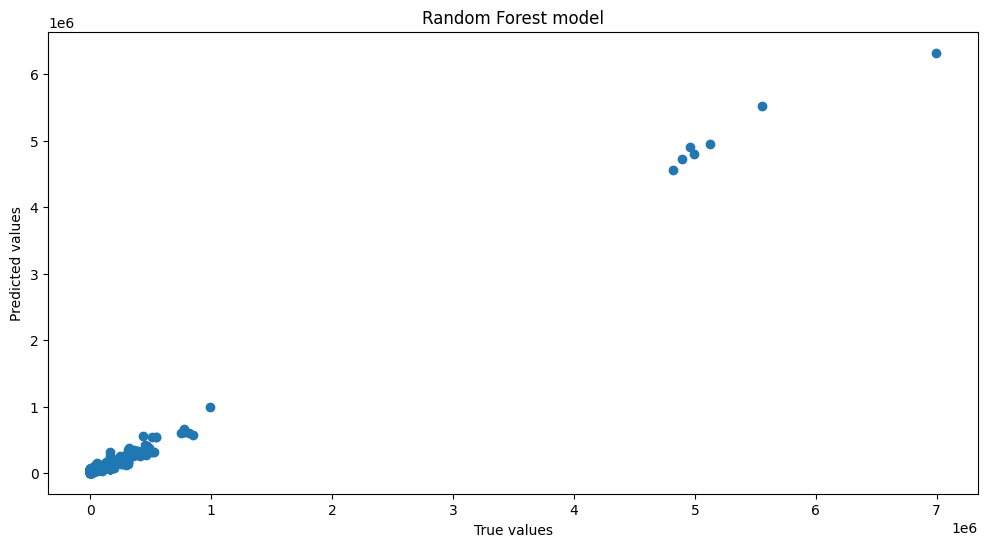

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Random Forest model")
plt.scatter(y_test_bis, forest_pred2)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

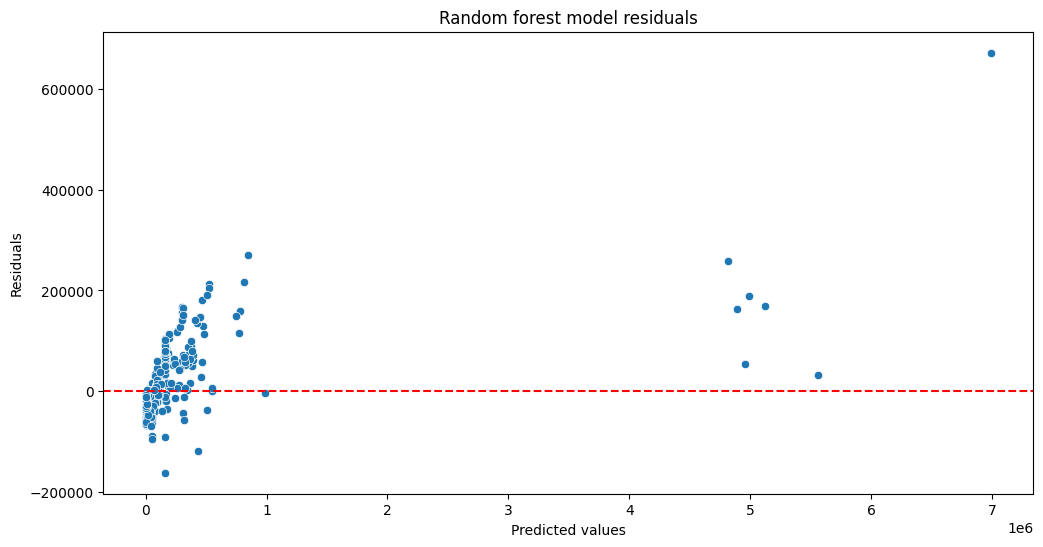

In [ ]:
rf2_residuals= y_test_bis- forest_pred2

plt.figure(figsize=(12,6))
plt.title("Random forest model residuals")
sns.scatterplot(x=y_test_bis, y=rf2_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Arbre optimal

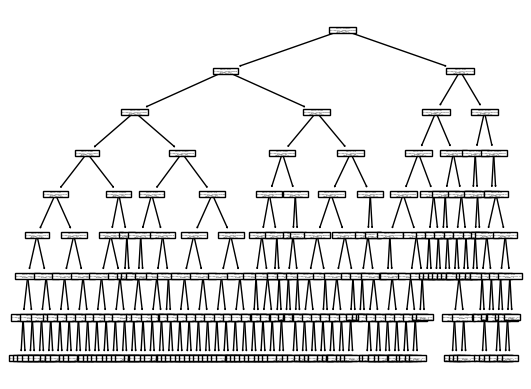

La profondeur optimale de l'arbre est :  8


In [ ]:
param2=[{"max_depth":list(range(2,10))}]
tree2_cv_bis= GridSearchCV(DecisionTreeRegressor(),param2,cv=10,n_jobs=-1)
tree2_Opt=tree2_cv_bis.fit(X_train, y_train)

treeG2_bis=DecisionTreeRegressor(max_depth=tree2_Opt.best_params_['max_depth'])
treeG2_bis.fit(X_train_bis,y_train_bis)
plot_tree(treeG2_bis,feature_names=dfc.columns.tolist());
plt.show()
print("La profondeur optimale de l'arbre est : " , tree2_Opt.best_params_['max_depth'])

In [ ]:
tree_opt_model_pred = treeG2_bis.predict(X_test_bis)

In [ ]:
r2_tree = r2_score(y_test, tree_opt_model_pred)
print("R2 modèle Arbre de décision :", r2_tree)

ValueError: Found input variables with inconsistent numbers of samples: [574, 730]

In [ ]:
rmse_tree= np.sqrt(mean_squared_error(y_test, tree_opt_model_pred))
print("RMSE sur la prédiction du GBR :", rmse_tree)

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Arbre décision modèle")
plt.scatter(y_test_bis, tree_opt_model_pred)
plt.show()

In [ ]:
tree_residuals= y_test_bis- tree_opt_model_pred

plt.figure(figsize=(12,6))
plt.title("Tree model residuals")
sns.scatterplot(x=y_test_bis, y=tree_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()